Yolov5 is an open source single stage object oriented detection program created by Ultalytics @ pytorch. To use yolov5 we need to import the repository, and other dependencies.

# 1. Imports and Connect drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Setup YOLOv5 from github and install

In [ ]:
# Set up 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 5948, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5948 (delta 0), reused 0 (delta 0), pack-reused 5944
Receiving objects: 100% (5948/5948), 8.35 MiB | 33.80 MiB/s, done.
Resolving deltas: 100% (4068/4068), done.
/content/yolov5
     |████████████████████████████████| 645kB 16.8MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# dependencies for YOLOV5
import torch
from IPython.display import Image, clear_output  # to display images
# show all is good 
clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Setup complete. Using torch 1.8.1+cu101 (Tesla T4)


Wandb, like tensorboard, is use to track and report model training and performance!

## 3. Wandb setup - to track the model and the performance

In [ ]:
# performance metric package - API key to authenticate for login and stores the model performance
%pip install wandb
!wandb login  # use 'wandb disabled' or 'wandb enabled' to disable or enable

     |████████████████████████████████| 2.1MB 17.6MB/s 
     |████████████████████████████████| 163kB 56.7MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
     |████████████████████████████████| 133kB 33.4MB/s 
     |████████████████████████████████| 71kB 11.6MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=dbe1295b58d931c08adee71345d477a023581b161d40711c5c8446923036efaa
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=25395594a850f33d68f2a52409d0729de72a2e378f8c80eacb6dd4e16f9a5d5b
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: 

In [ ]:
#%load_ext tensorboard - can be used for inline report of runs
# Start Tensorboard with "tensorboard --logdir runs/"
#!tensorboard --logdir runs/

In our case, using asl.yaml file exported from Roboflow to train our model.

Code below will use yolov5x.pt pretrained weights as a starting point.

## 4. Import Augmented images from RoboFlow

In [ ]:
#Roboflow Import
!curl -L "https://app.roboflow.com/ds/BY8po4TO11?key=WJhJucKt9b" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1647      0 --:--:-- --:--:-- --:--:--  1644
100  102M  100  102M    0     0  63.9M      0  0:00:01  0:00:01 --:--:--  224M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/DJI_0252_JPG.rf.9d3c93f83049e7c4c25be8487c3495bb.jpg  
 extracting: test/images/DJI_0254_JPG.rf.ee8c1453d554c63fc552b1ba9c1326c8.jpg  
 extracting: test/images/DJI_0255_JPG.rf.a60814359b827bfaa165c1aeeeee49a9.jpg  
 extracting: test/images/DJI_0257_JPG.rf.1c6691ed97be122b0cc5ec07fdde0c6b.jpg  
 extracting: test/images/DJI_0259_JPG.rf.af86135c5ec5ea6878f4662bb434674e.jpg  
 extracting: test/images/DJI_0265_JPG.rf.e87e00ce9c317f94b3754fbc8e460ec6.jpg  
 extracting: test/images/DJI_0269_JPG.rf.553826ee73a5dd55d36

## 5. Run Train.py from YOLOV5

We are using image size of 640 with 70 epochs. asl.yaml is the config file and yolov5s.pt if the pretrained model from YOLOV5

In [ ]:
!python train.py --img 640 --batch 2 --epochs 70 --data asl.yaml --weights yolov5s.pt

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/ultralytics/yolov5
 * [new branch]      patch      -> origin/patch
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-36-g3665c0f torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=2, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='./data/asl.yaml', device='', entity=None, epochs=70, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=2, upload_d

## 6. Display Training Data Images during Training job

GROUND TRUTH TRAINING DATA:


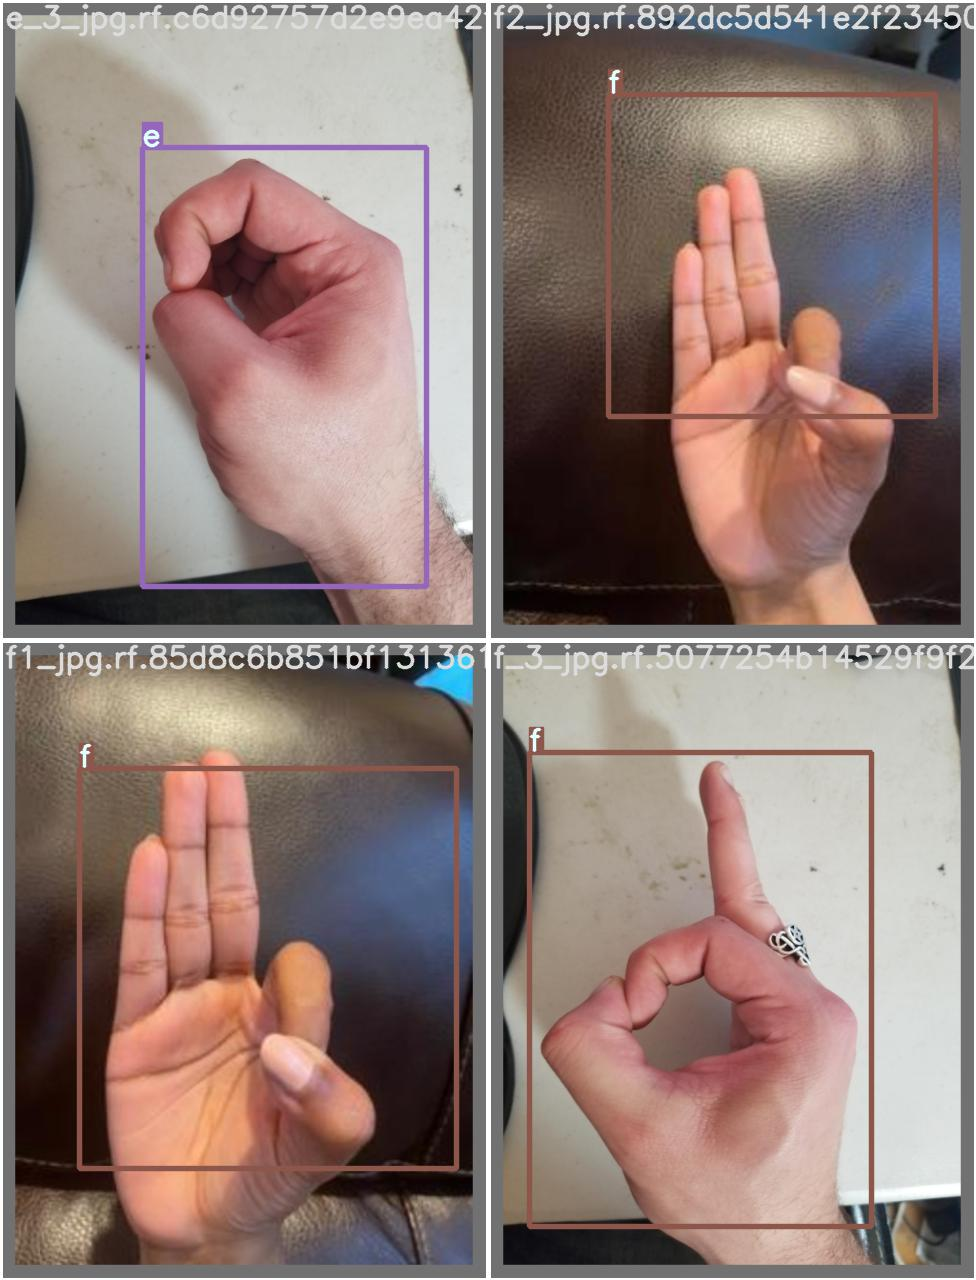

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/exp/test_batch2_labels.jpg', width=700)

## 7. Display Augmented Data Images during Training job

GROUND TRUTH AUGMENTED TRAINING DATA:


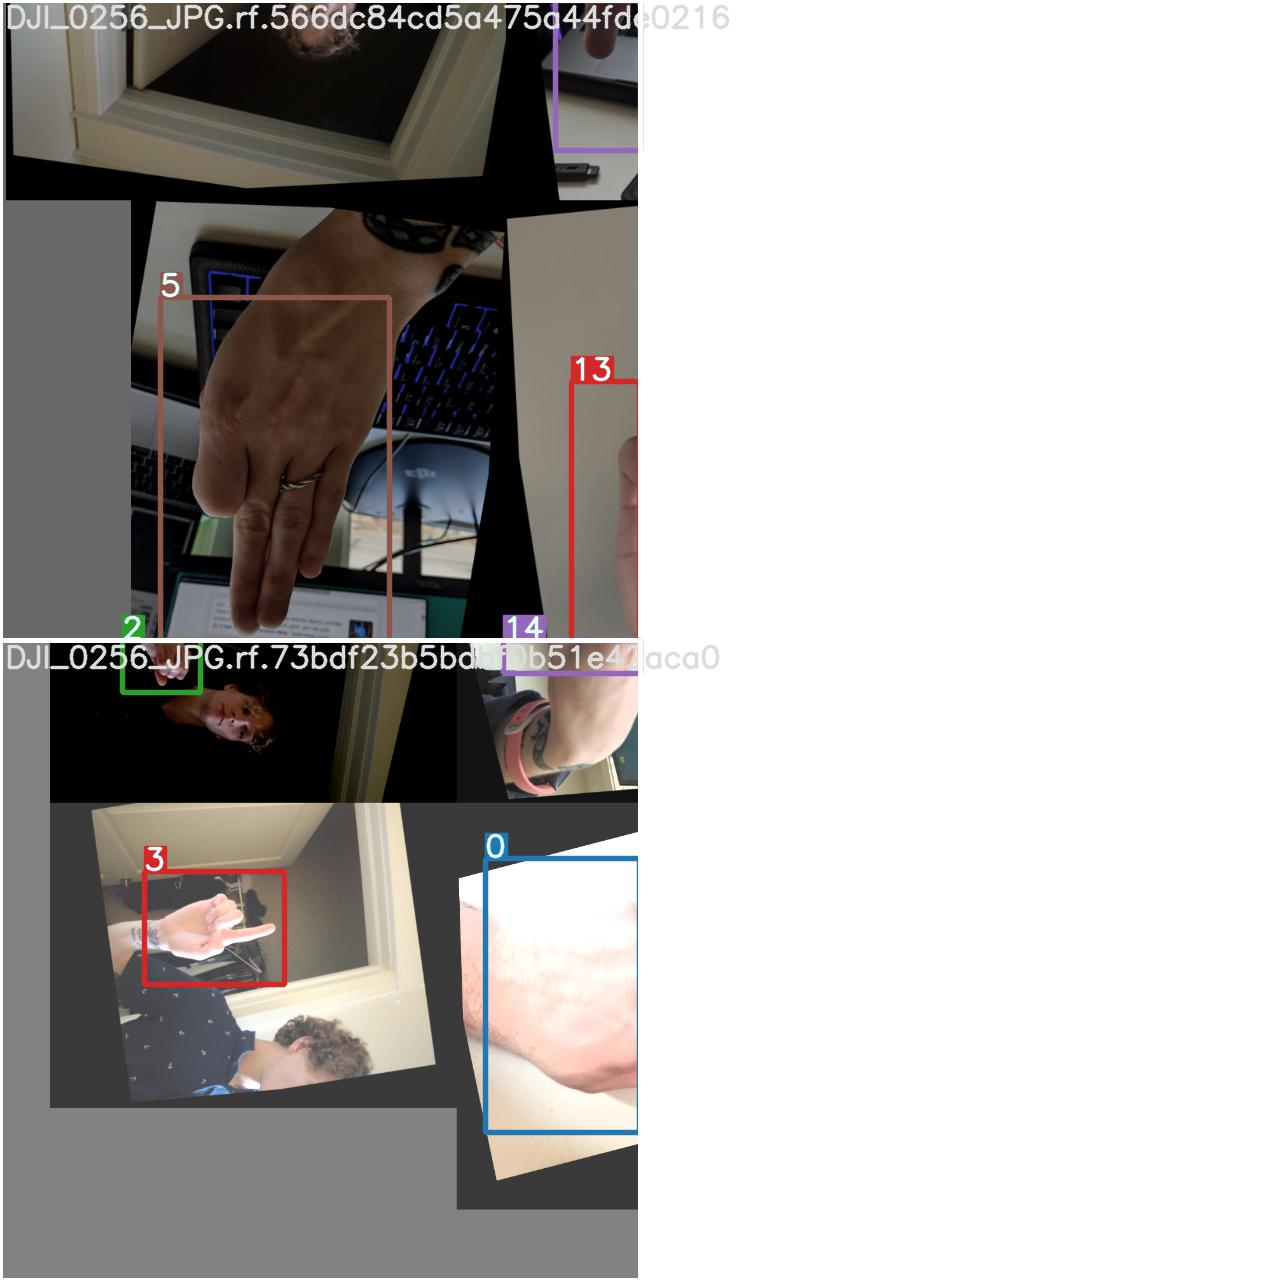

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/exp/train_batch2.jpg', width=900)

## 8. Plotting YOLOv5 model performance

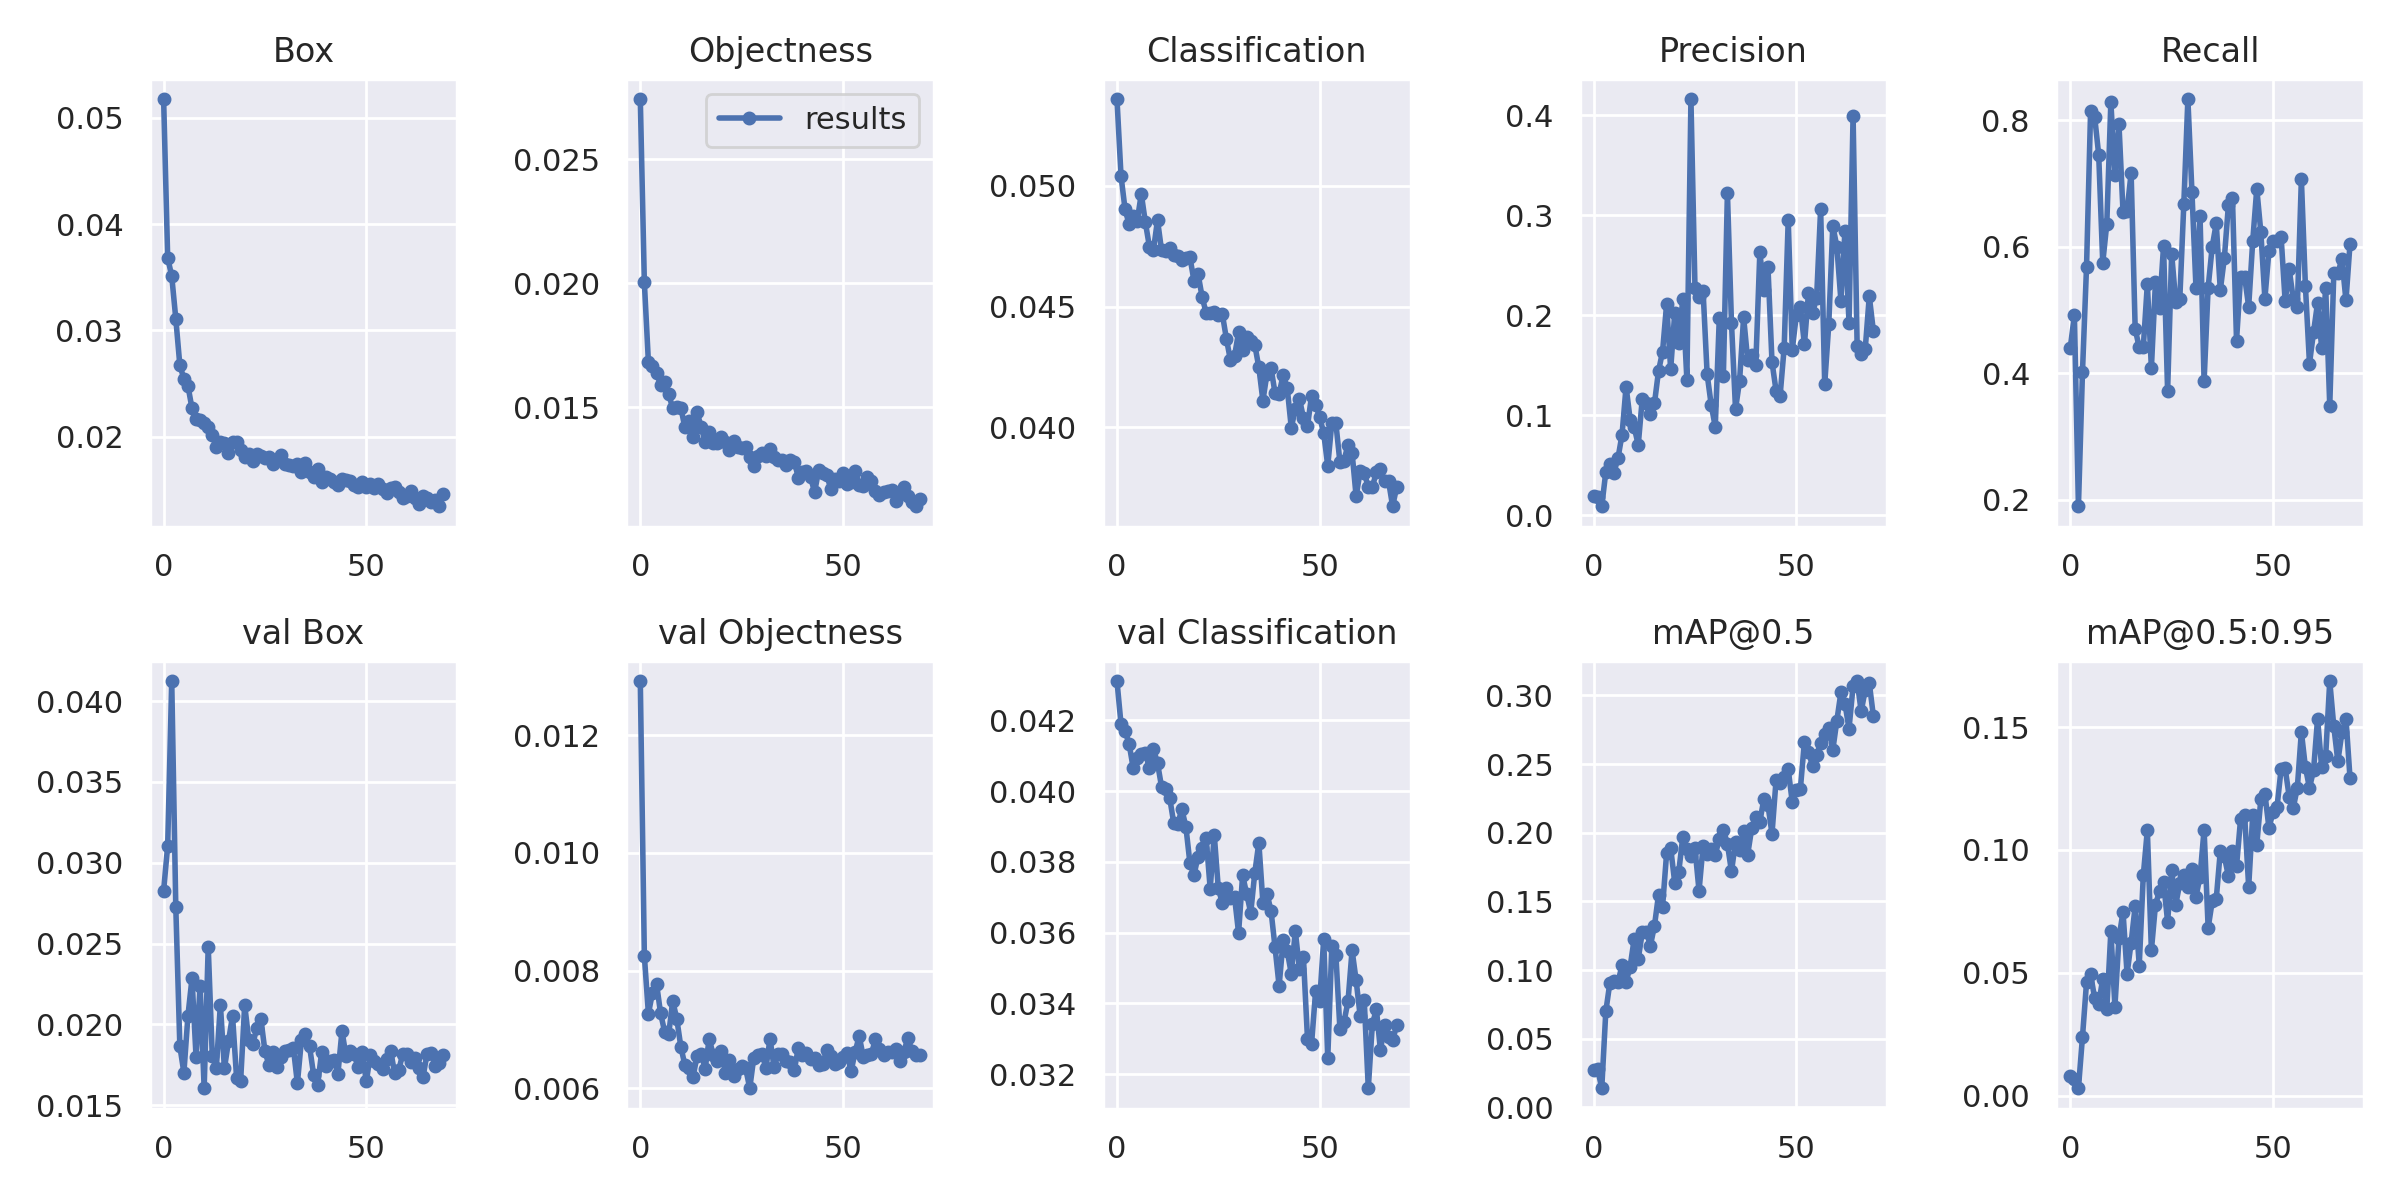

In [ ]:
#Plotting YoloV5 Performance
Image(filename='./runs/train/exp/results.png', width=1500)

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [ ]:
%ls runs/train/exp/weights

best.pt  last.pt


## 9. Run our Predictions

Now we make PREDICTIONS using YOLOv5 model output. Results from here should be eported to yolov5/runs/detect/

In [ ]:
%cd /content/yolov5/

/content/yolov5


In [ ]:
# using detect.py to run predictions

!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.05 --source test/images/


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.05, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='test/images/', update=False, view_img=False, weights=['/content/yolov5/runs/train/exp/weights/best.pt'])
YOLOv5 🚀 v5.0-36-g3665c0f torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7115941 parameters, 0 gradients, 16.5 GFLOPS
image 1/127 /content/yolov5/test/images/DJI_0252_JPG.rf.9d3c93f83049e7c4c25be8487c3495bb.jpg: 480x640 1 c, 1 d, Done. (0.011s)
image 2/127 /content/yolov5/test/images/DJI_0254_JPG.rf.ee8c1453d554c63fc552b1ba9c1326c8.jpg: 480x640 1 c, 1 d, Done. (0.010s)
image 3/127 /content/yolov5/test/images/DJI_0255_JPG.rf.a60814359b827bfaa165c1aeeeee49a9.jpg: 480x640 1 c, 1 d, Done. (0.010s)
image 4/127 /content/yolov5/test/images/DJI_0257_JPG.rf

## 10. Plot and Validate Confusion Matrix

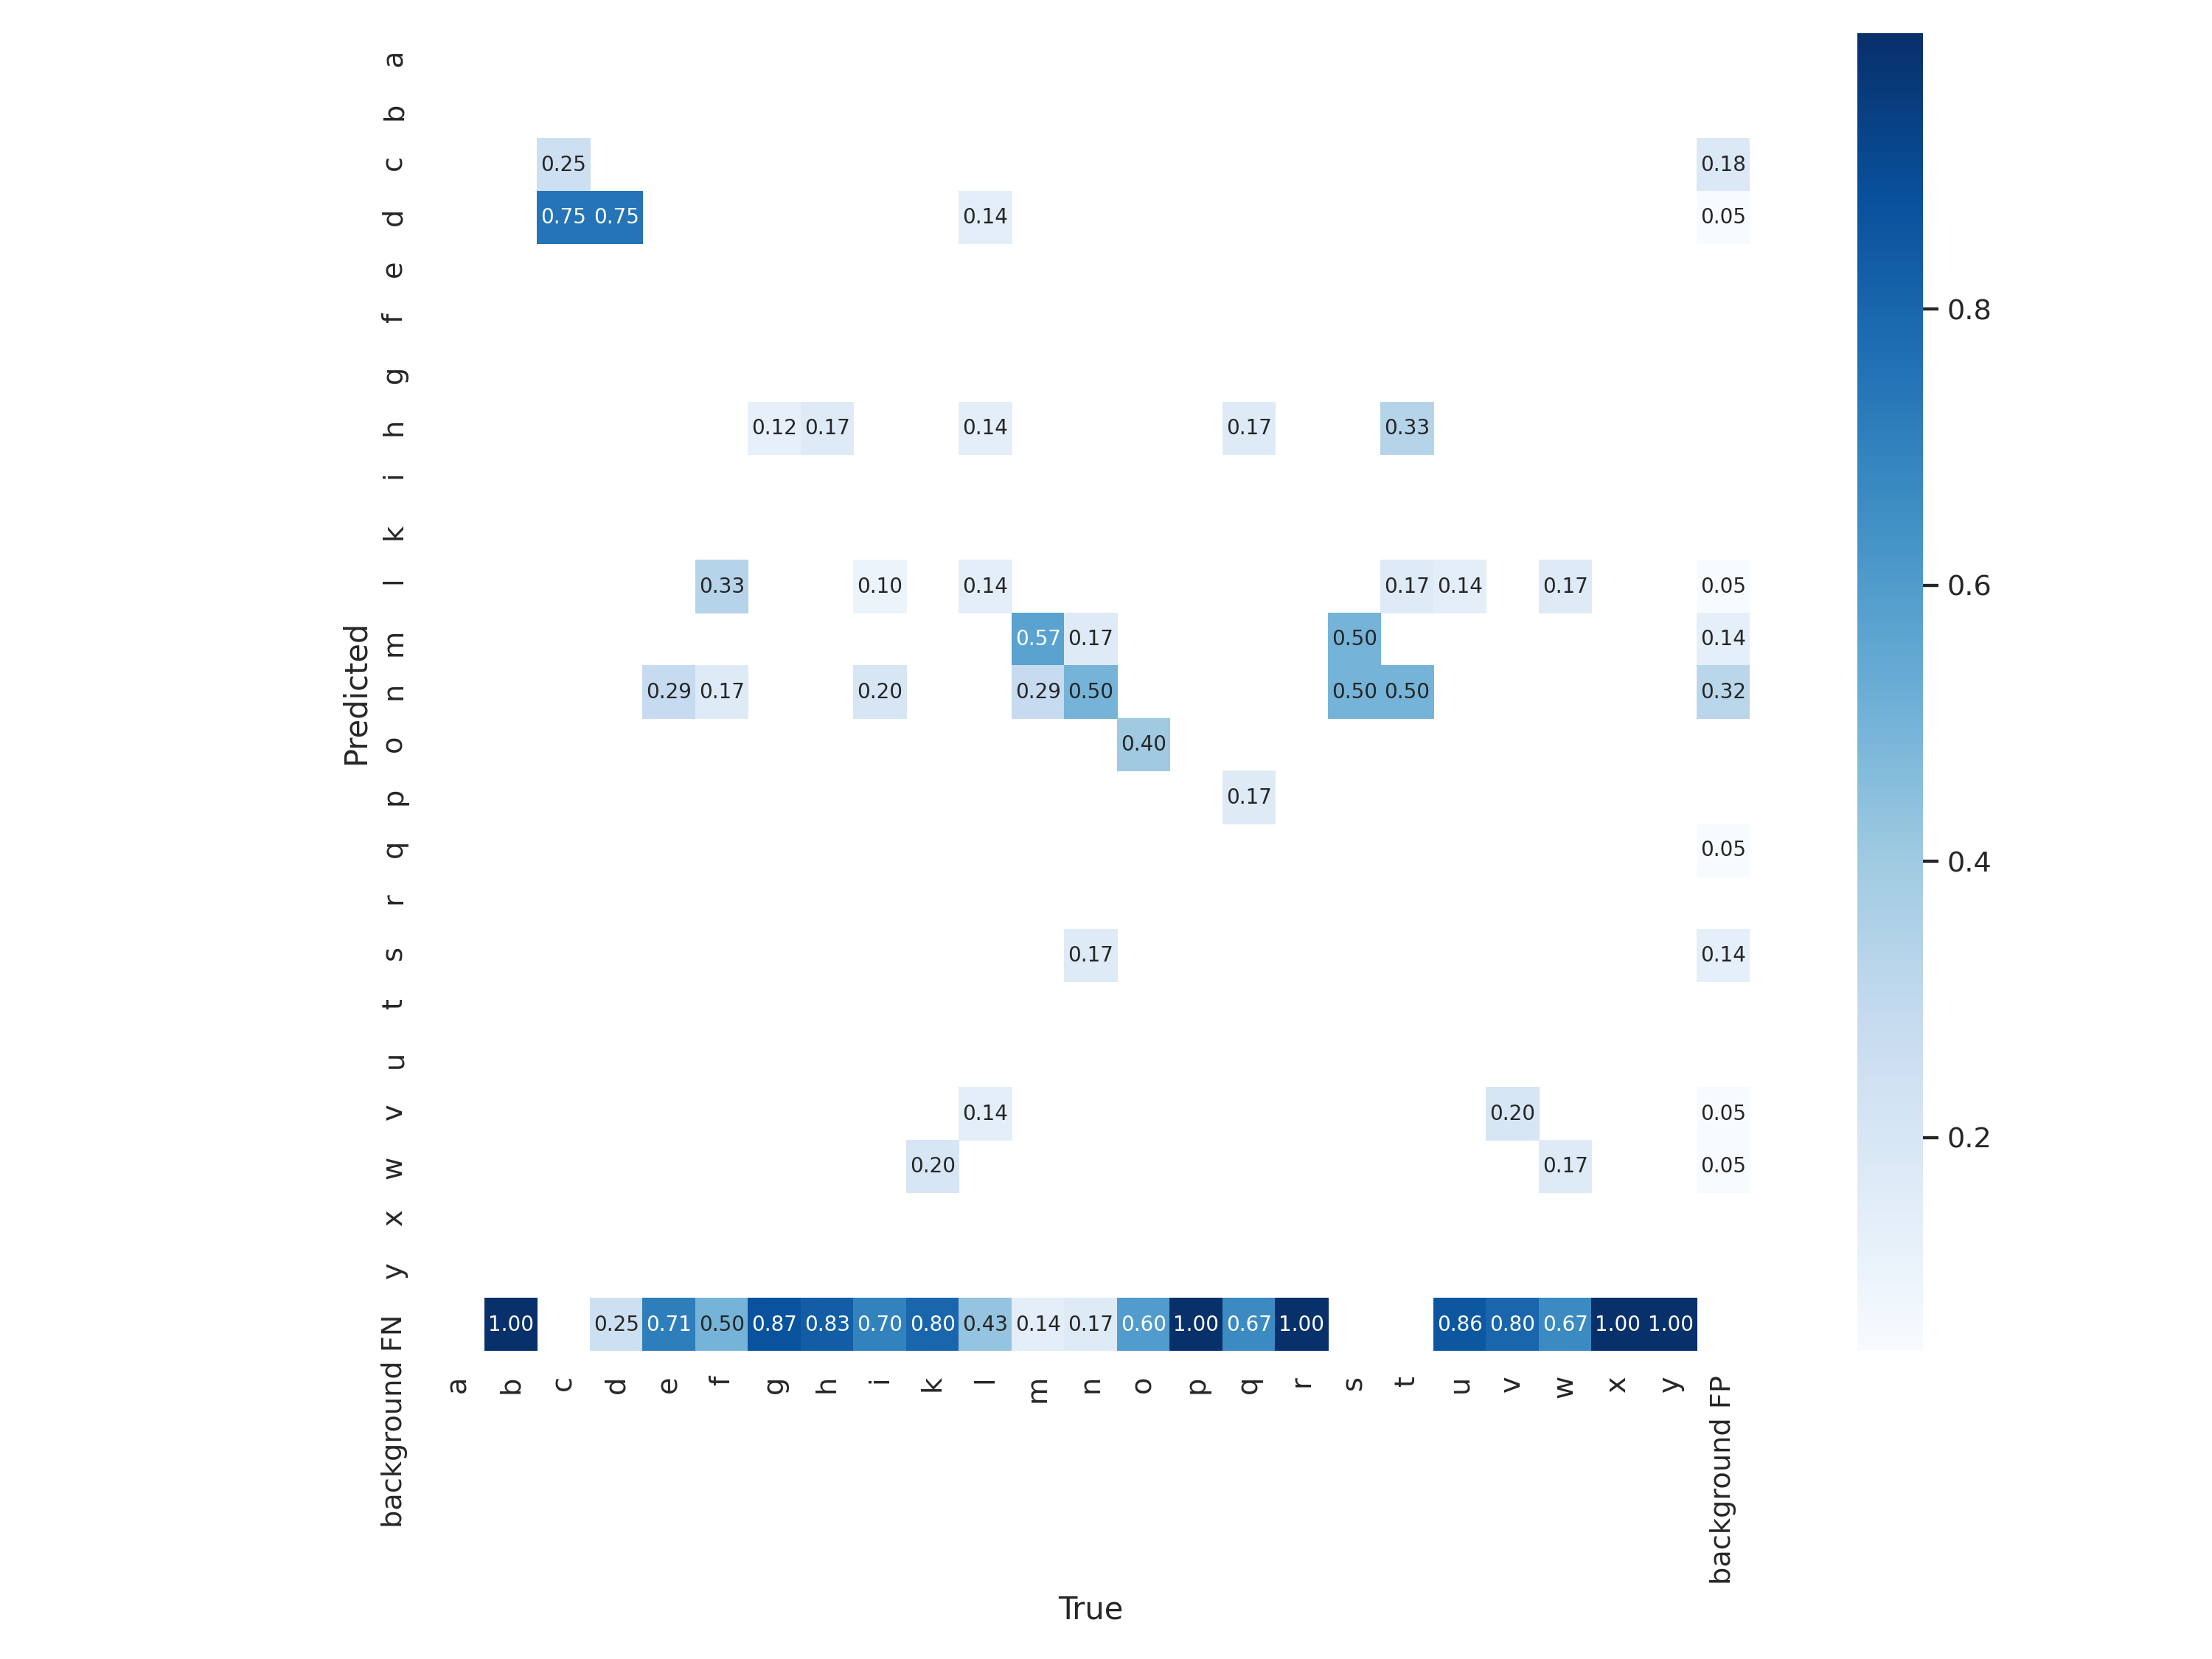

In [ ]:
Image(filename='./runs/train/exp/confusion_matrix.png', width=1500)

## 11. Plot F1 curve

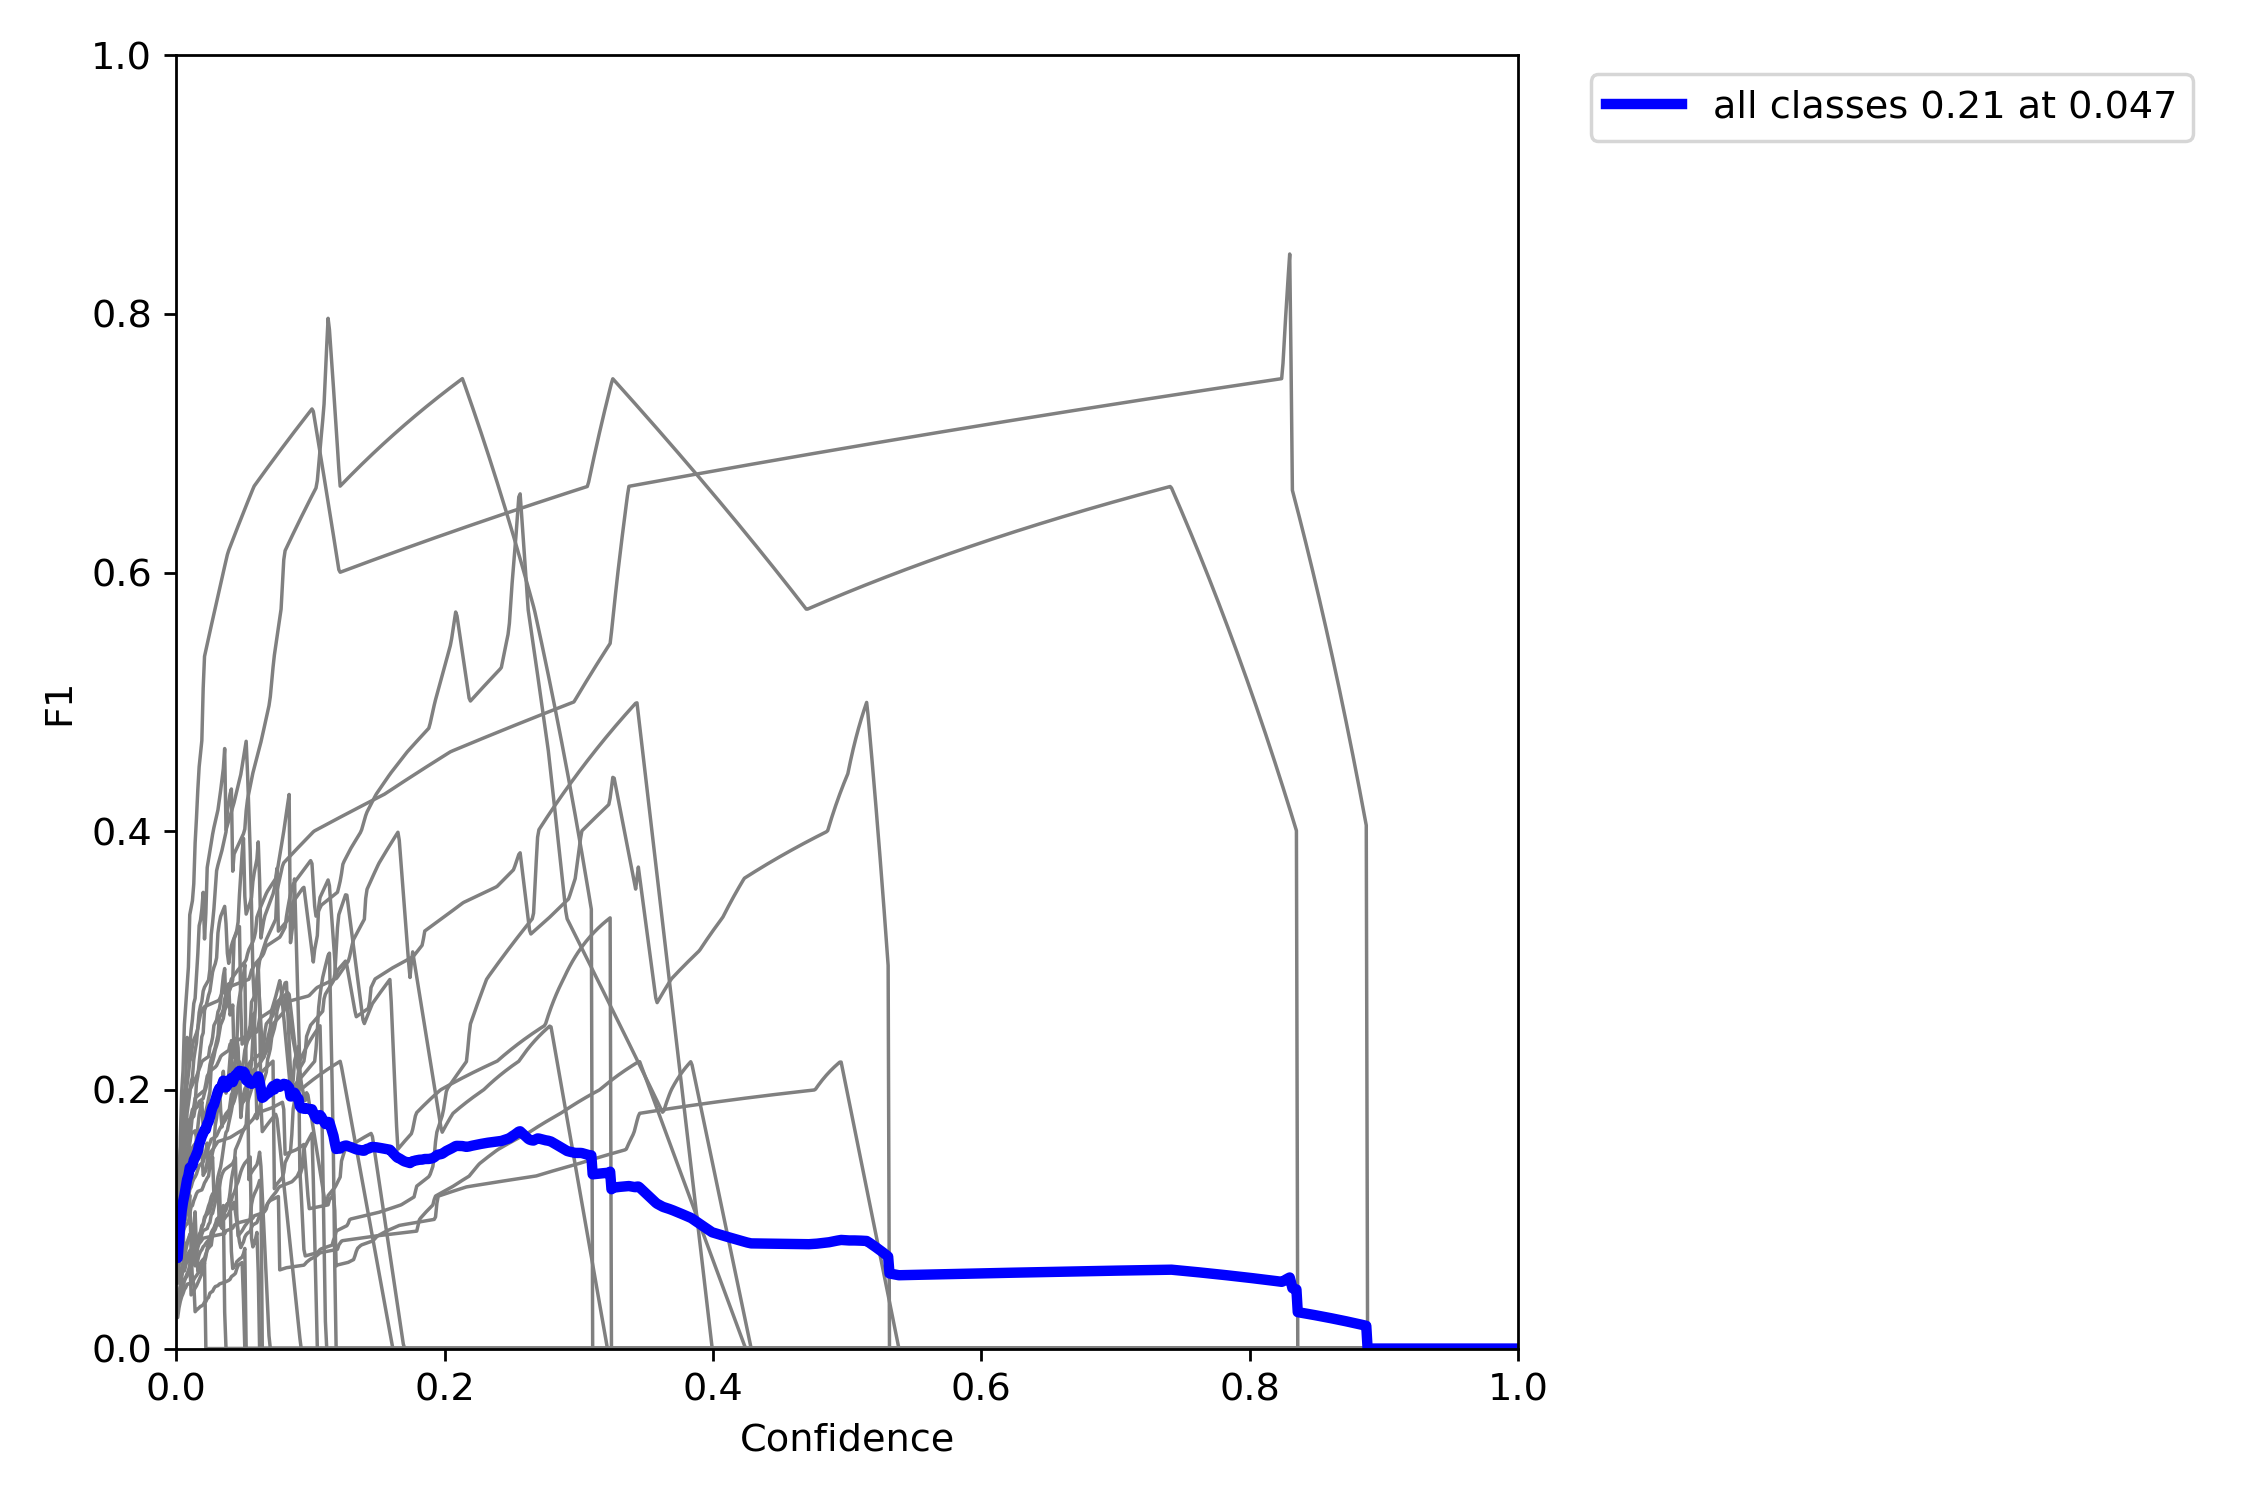

In [ ]:
Image(filename='./runs/train/exp/F1_curve.png', width=1000)

## 12. Plot Precision curve

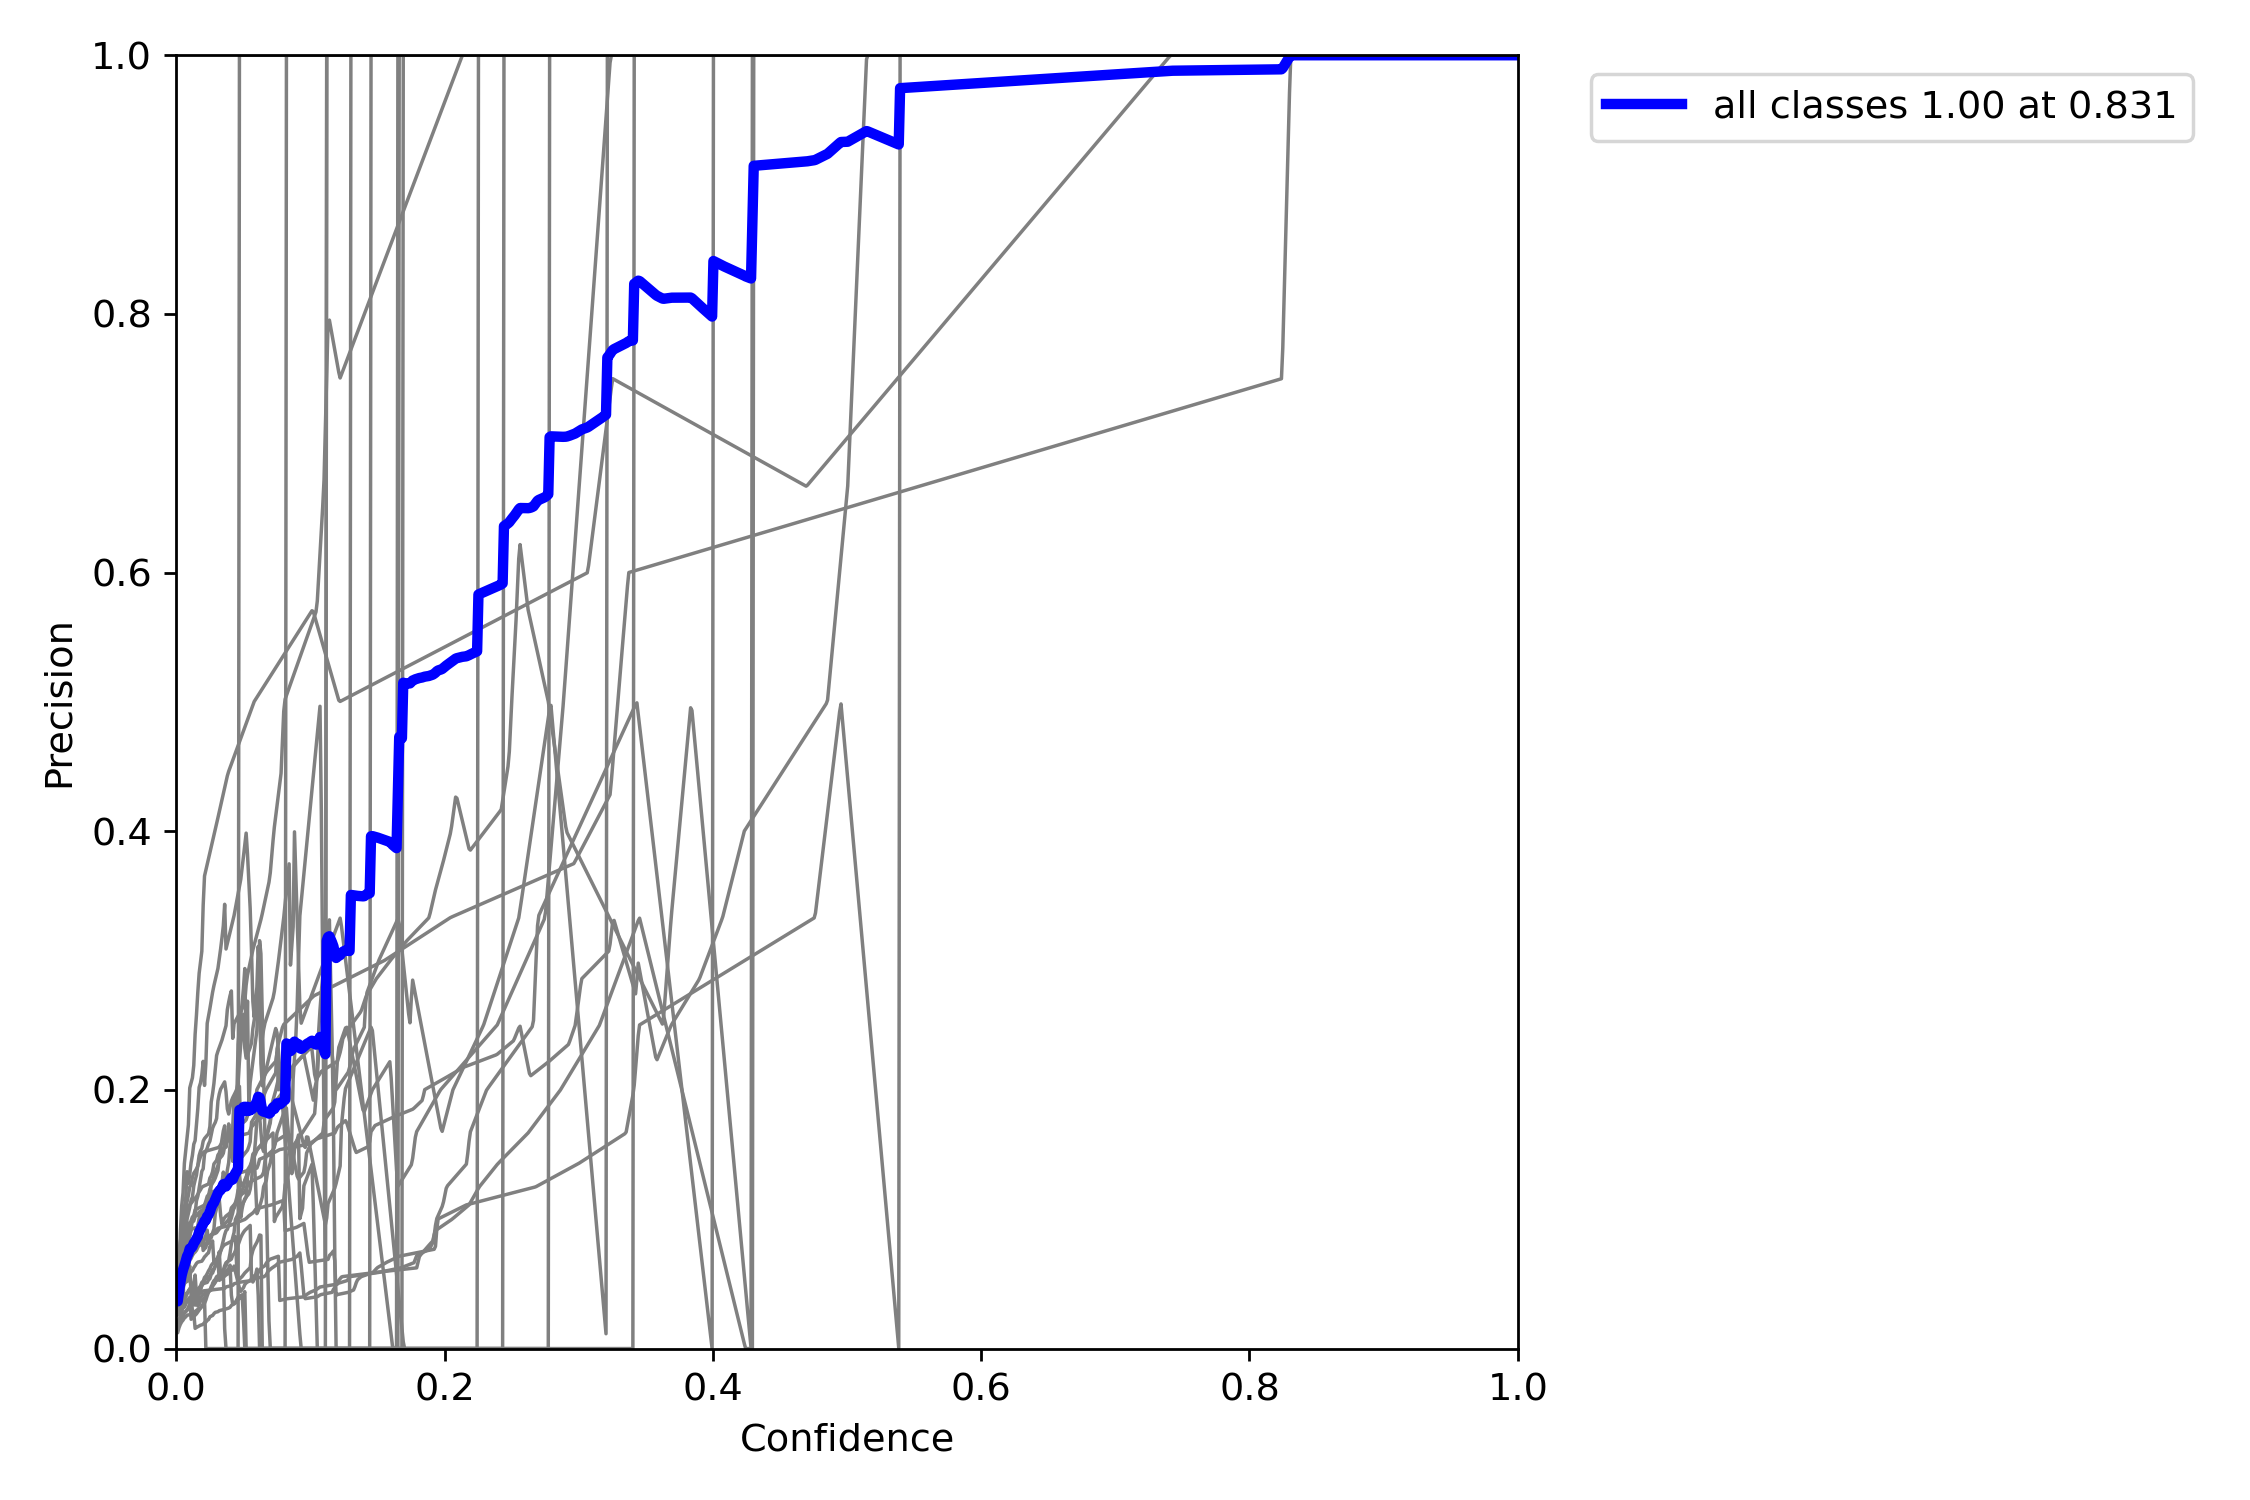

In [ ]:
Image(filename='./runs/train/exp/P_curve.png', width=900)

## 13. Plot Recall curve

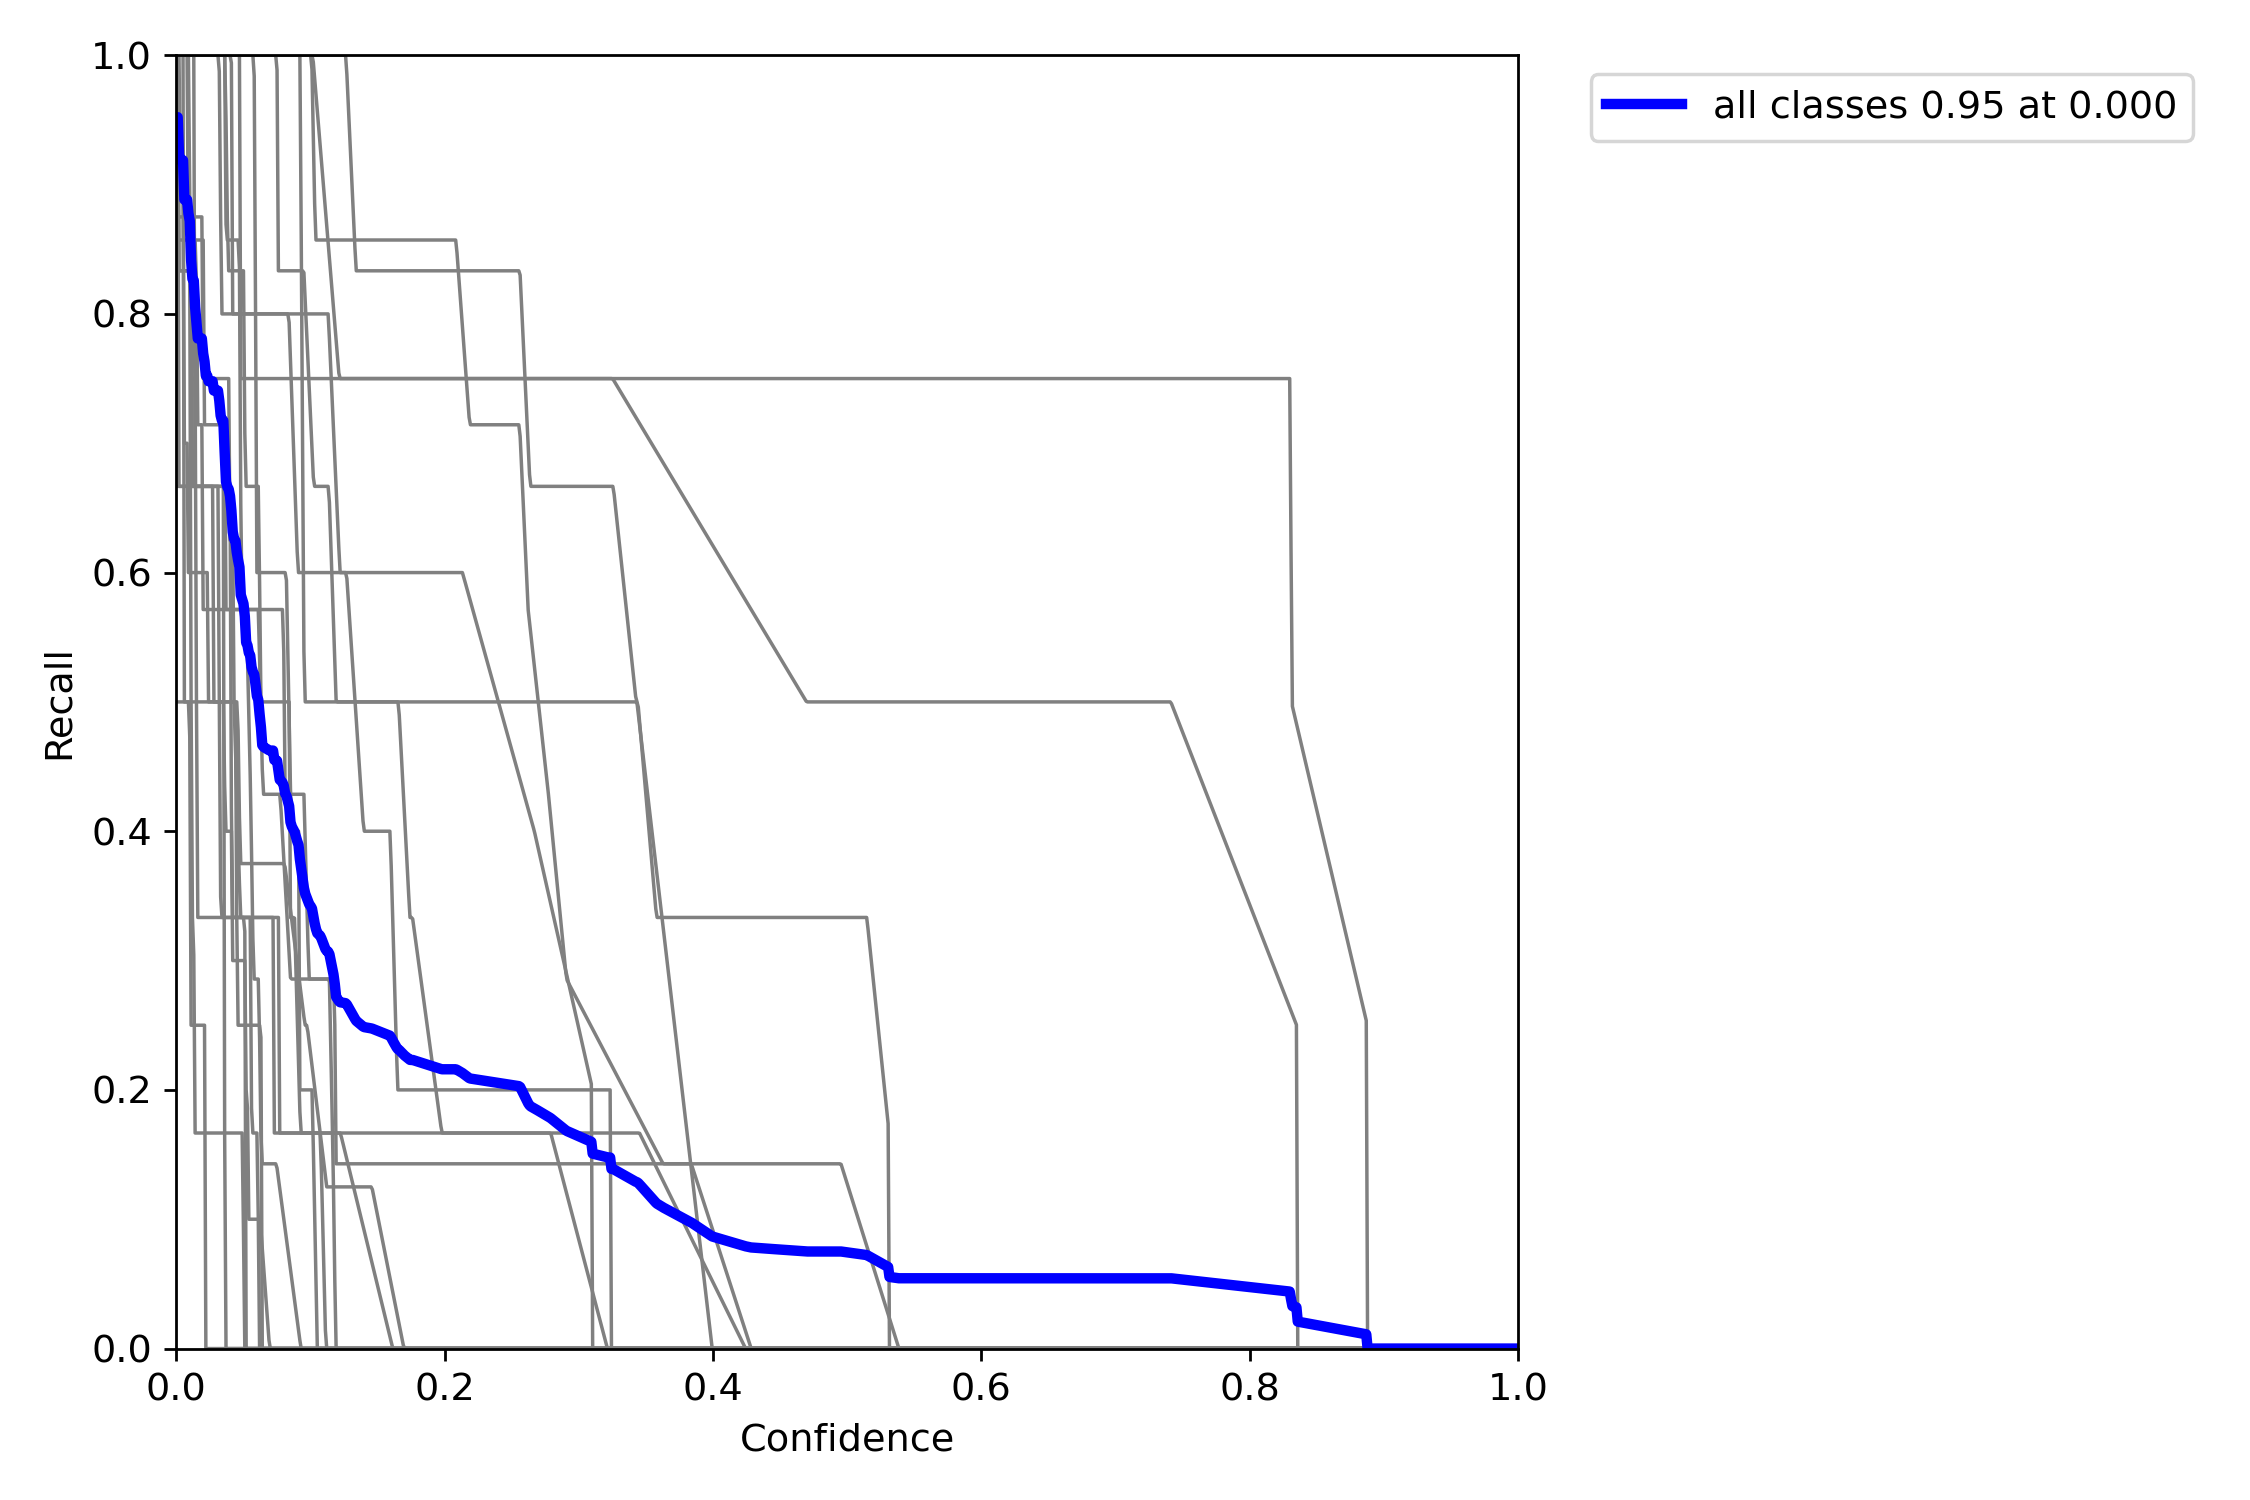

In [ ]:
Image(filename='./runs/train/exp/R_curve.png', width=1500)

## 14. Display our predictions from test image

Based on what our model predicted, few labels are not predicted correctly. showing below where p was predicted correctly, other letters c, y, h either predicted wrong or had wrong labels during augmentation.

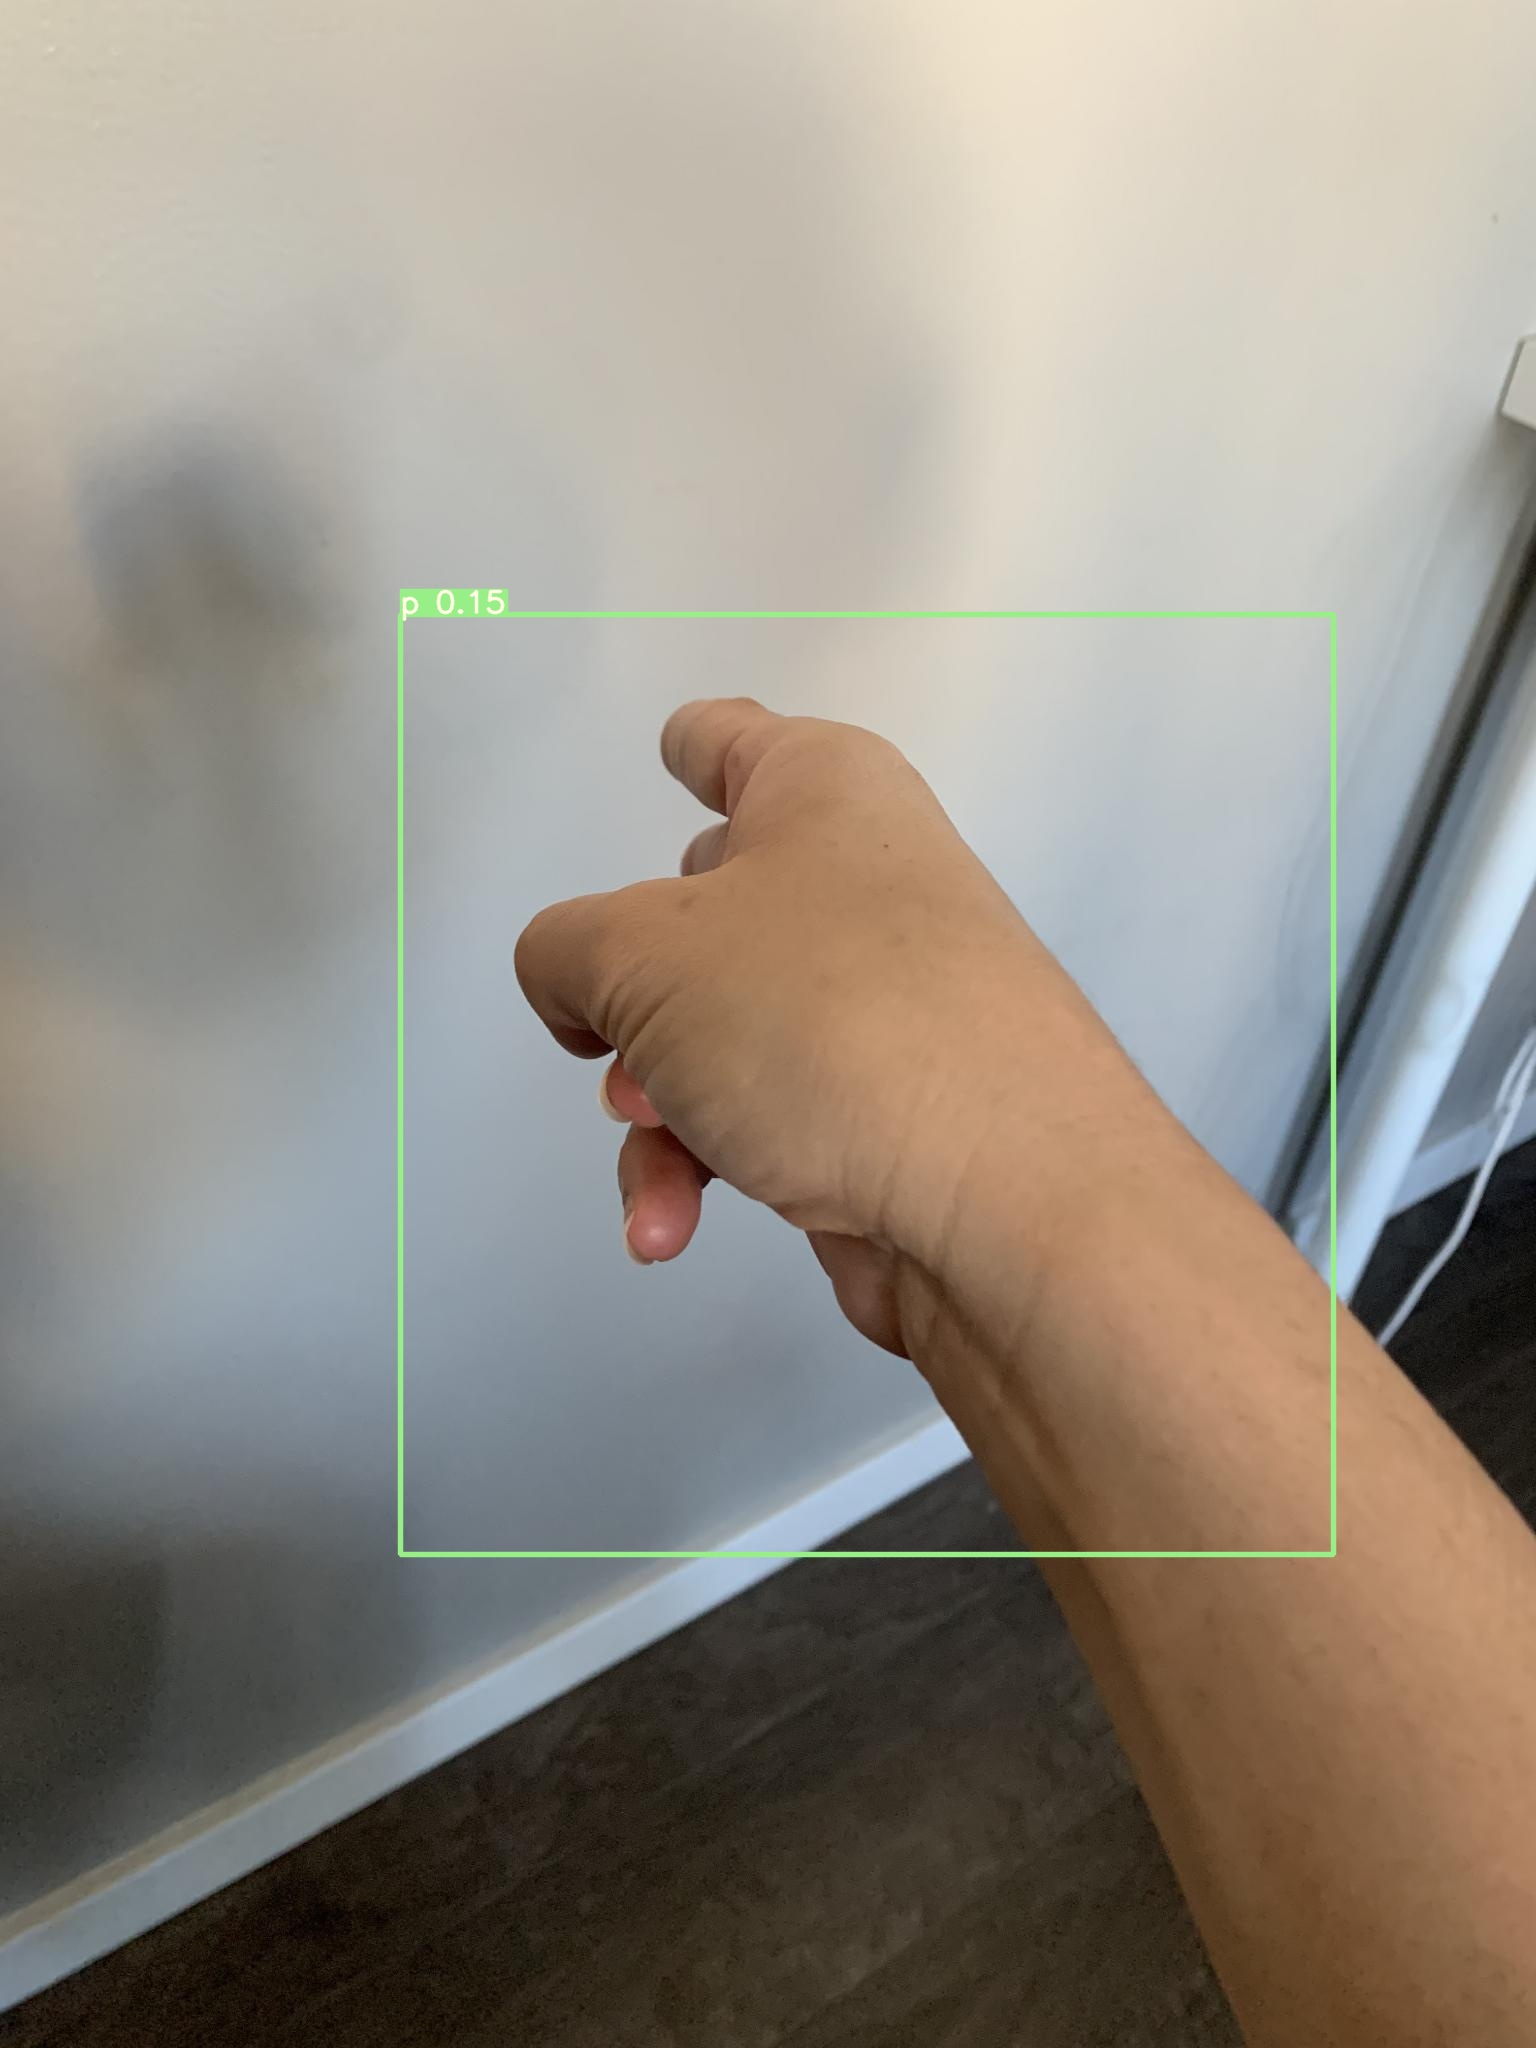

In [ ]:
Image(filename='./runs/detect/exp2/IMG_1858_JPG.rf.1fb73e4400d025d7ce4a1ae8865be125.jpg', width = 700)

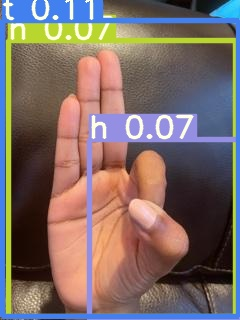

In [ ]:
Image(filename='./runs/detect/exp2/f1_jpg.rf.85d8c6b851bf131361cbd21846fc9934.jpg', width = 700)

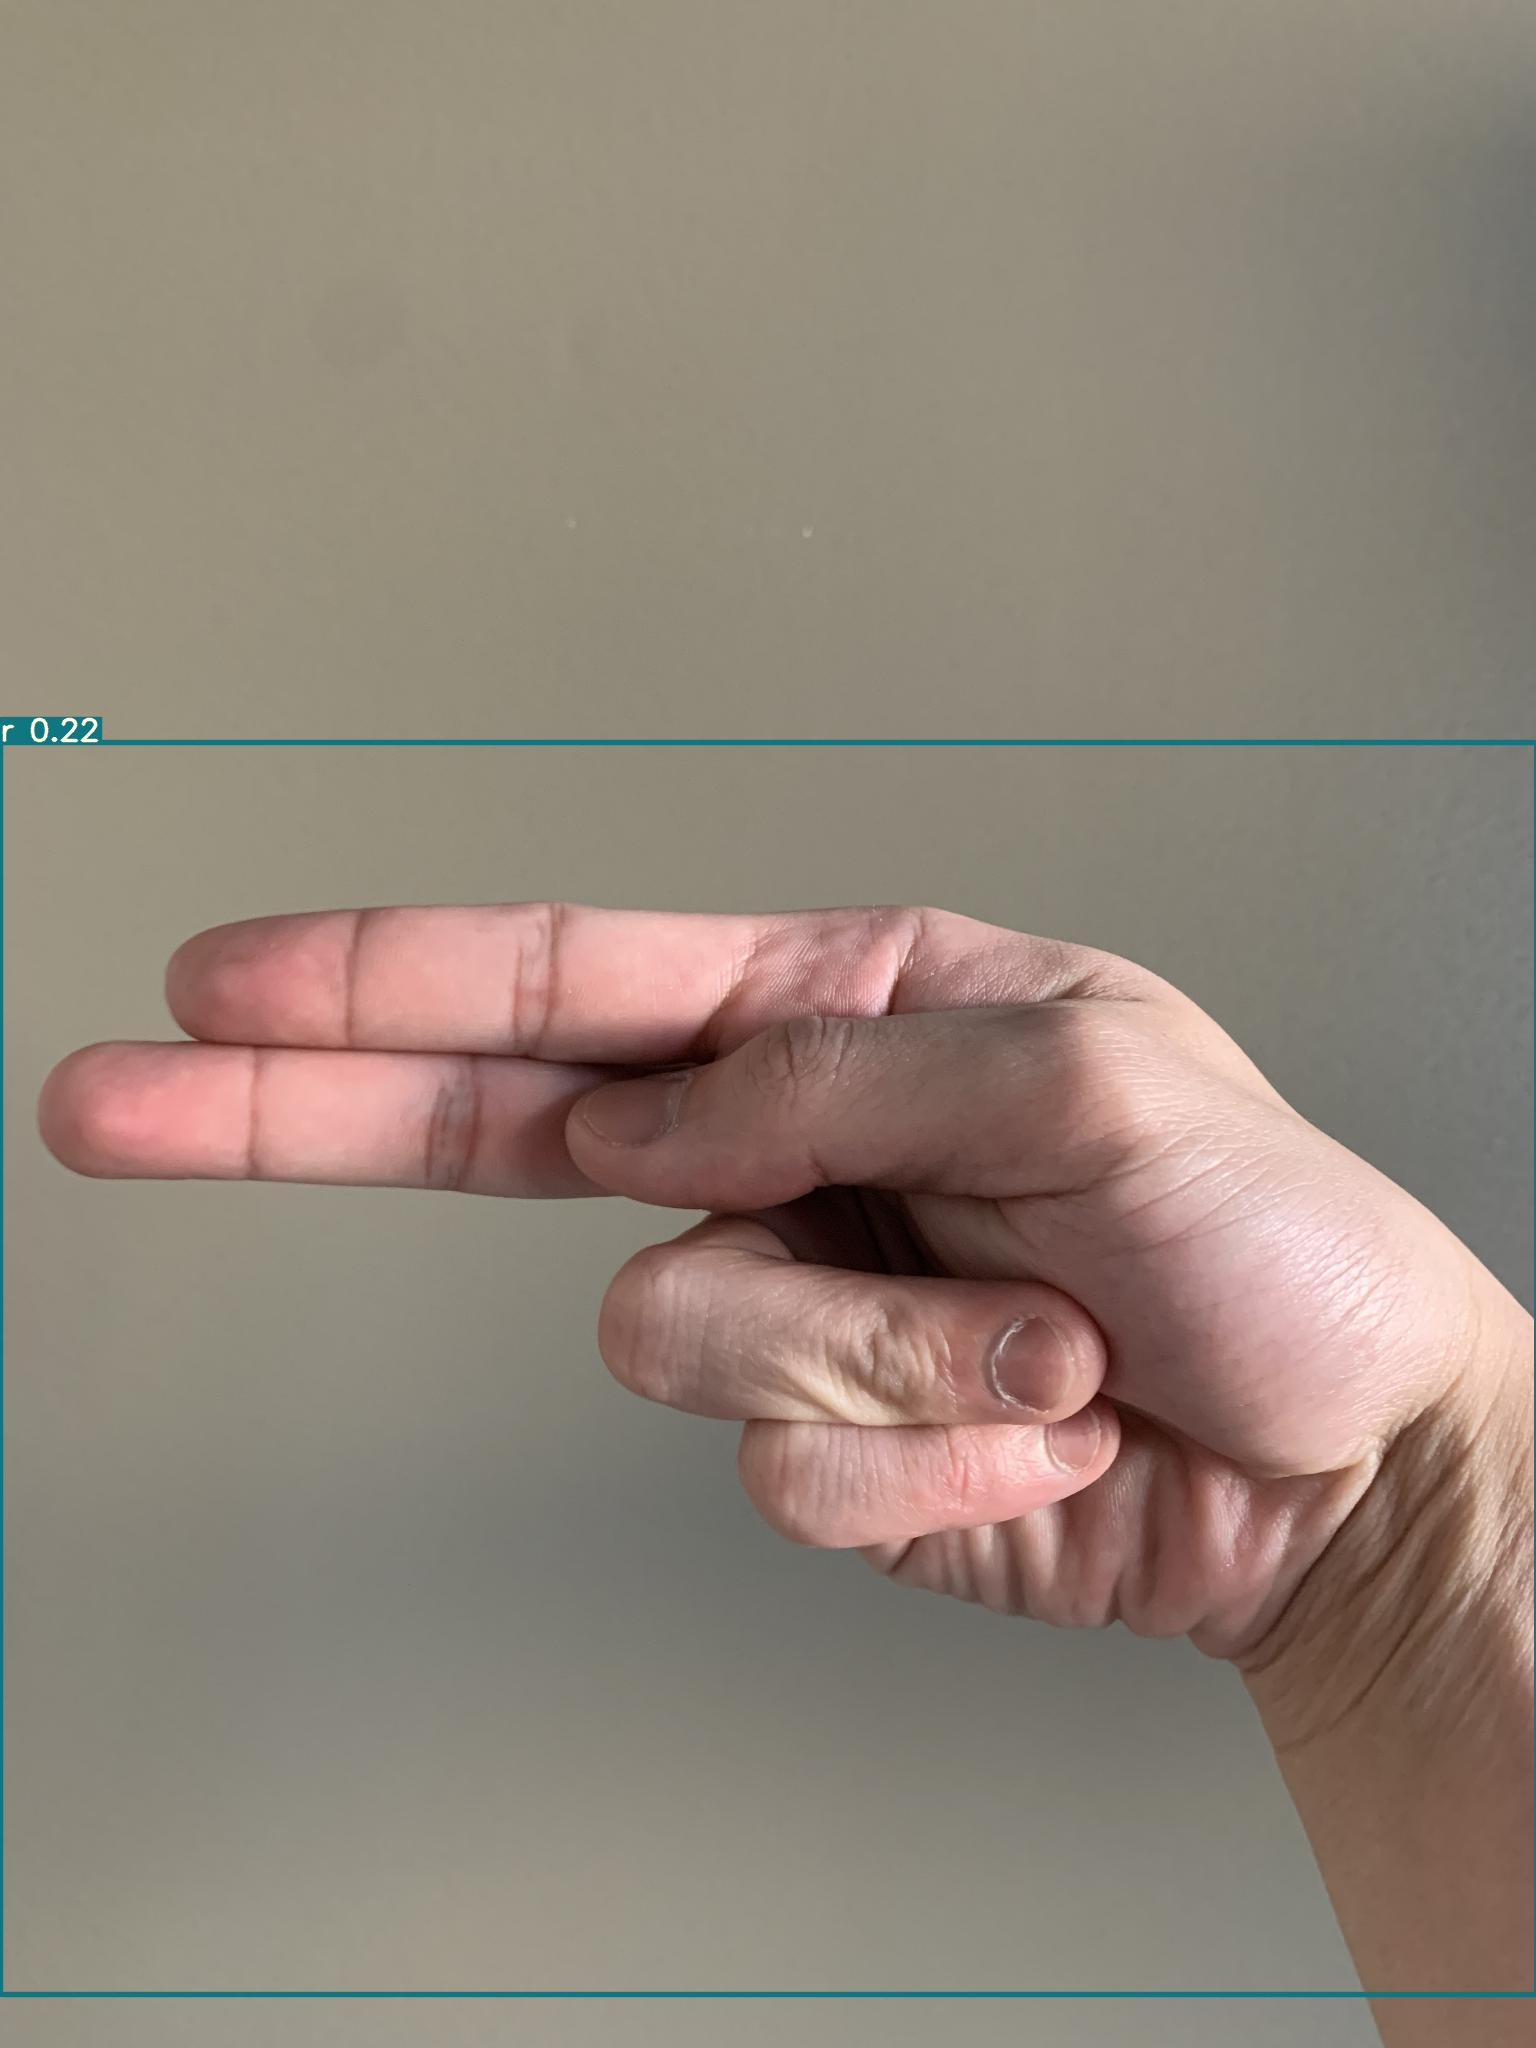

In [ ]:
Image(filename='./runs/detect/exp2/IMG_1964_JPG.rf.cdf5abbf3b9fdc9da8e89372560f1553.jpg', width = 700)

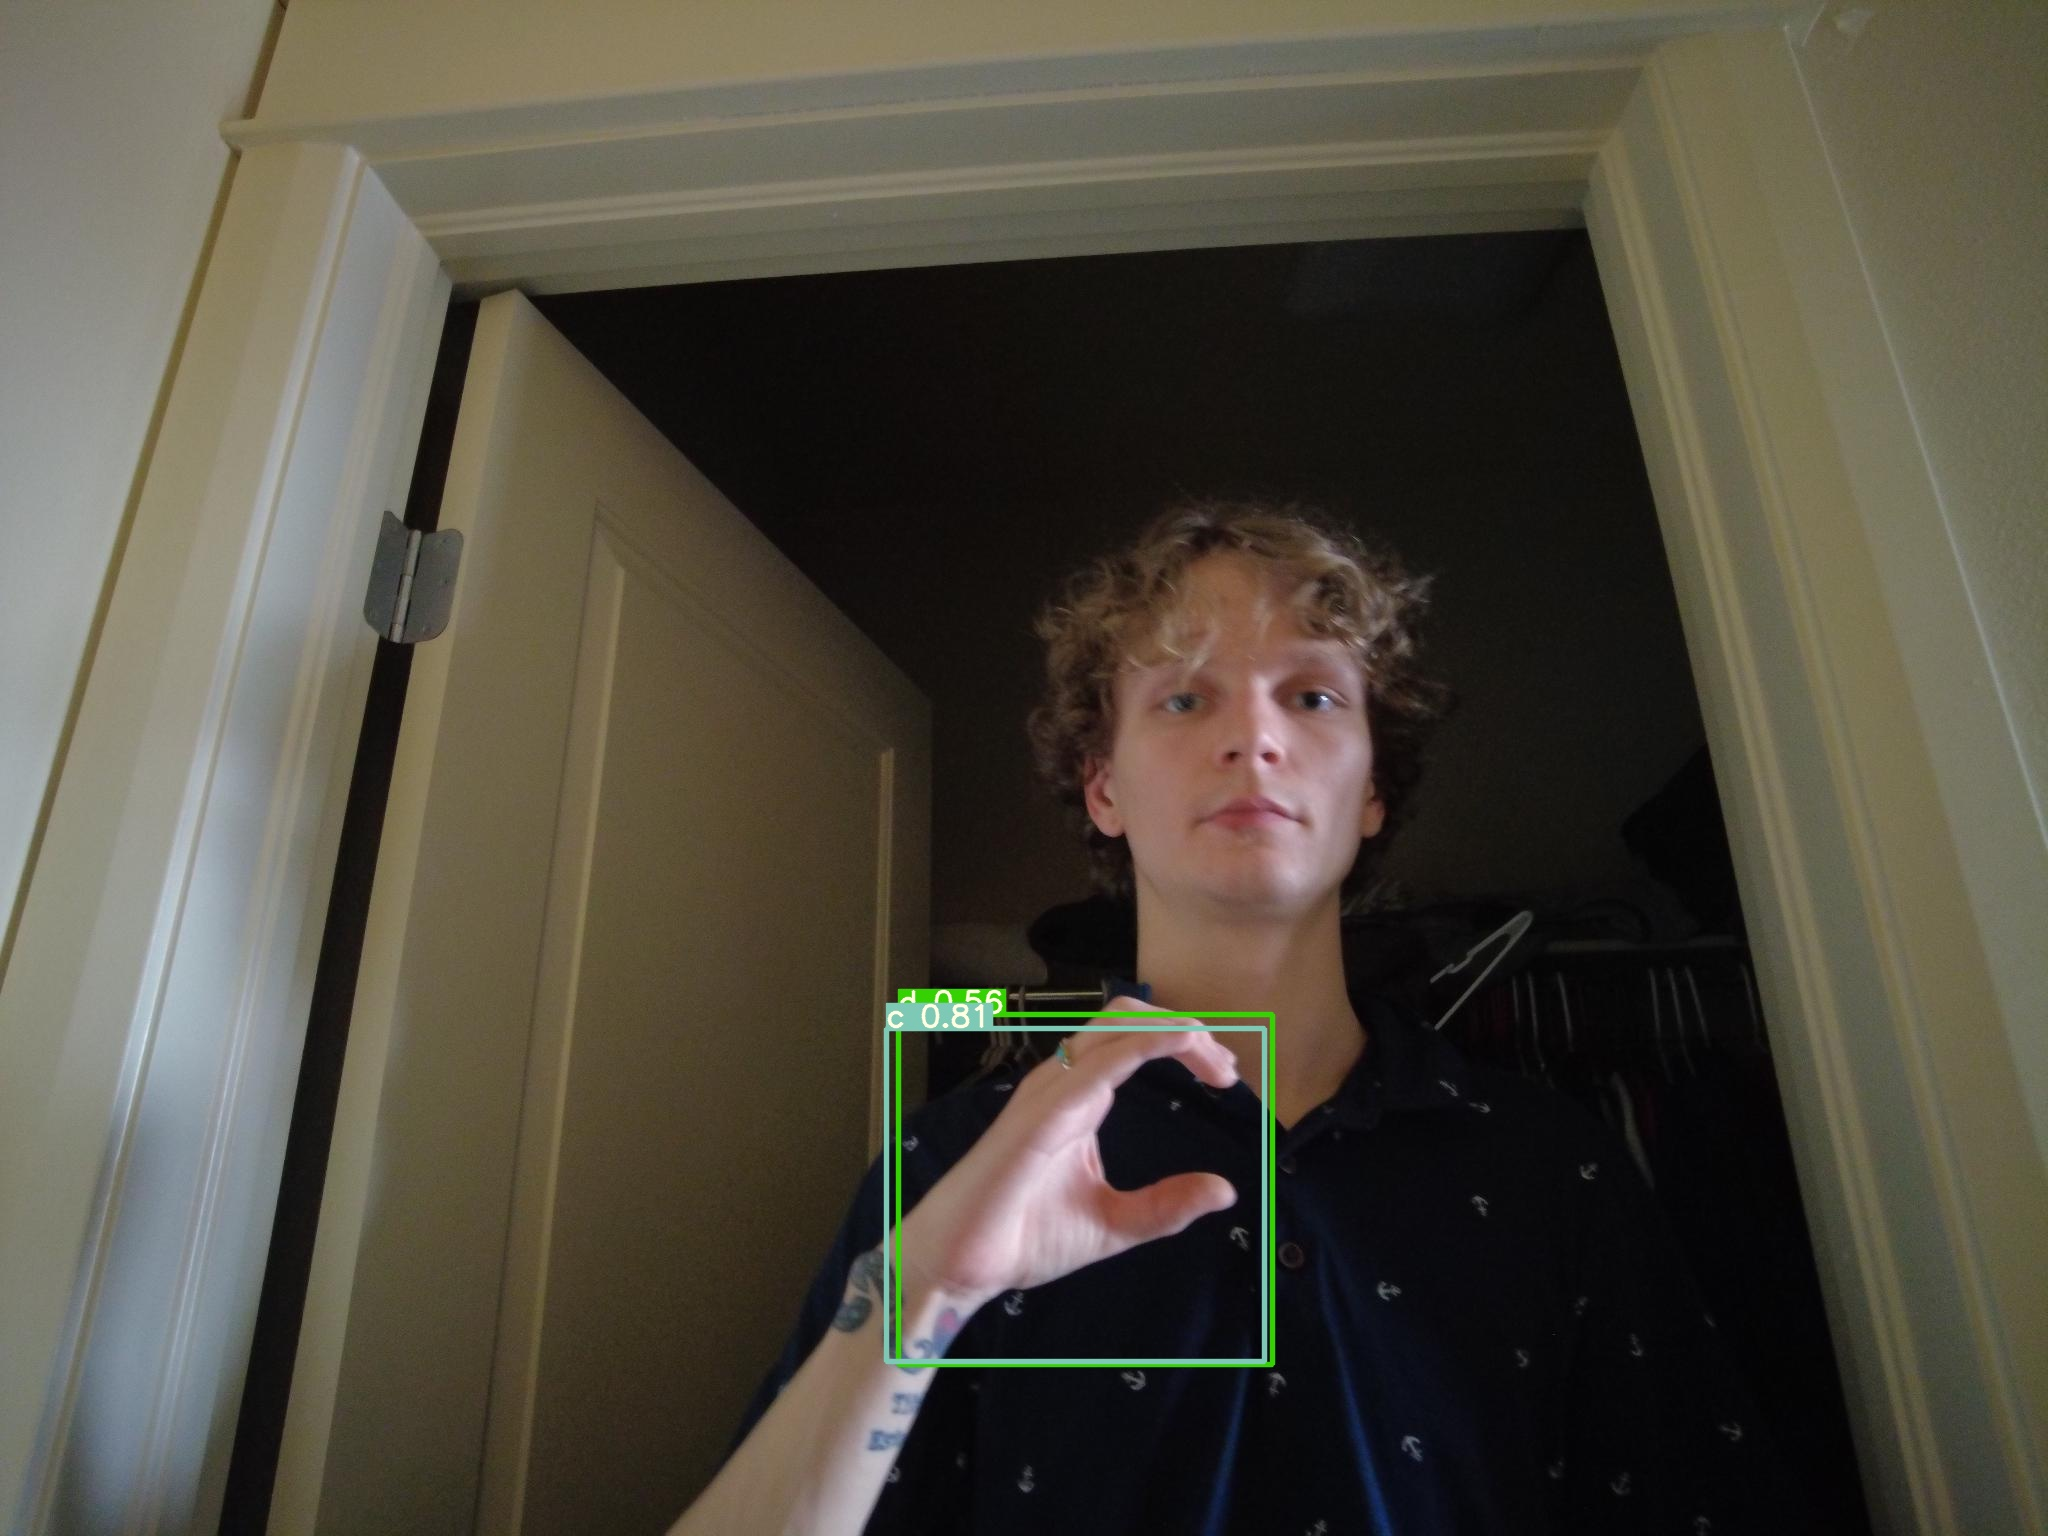

In [ ]:
# Image(filename='./runs/detect/exp2/', width = 900)
Image(filename='./runs/detect/exp2/DJI_0252_JPG.rf.9d3c93f83049e7c4c25be8487c3495bb.jpg', width = 700)

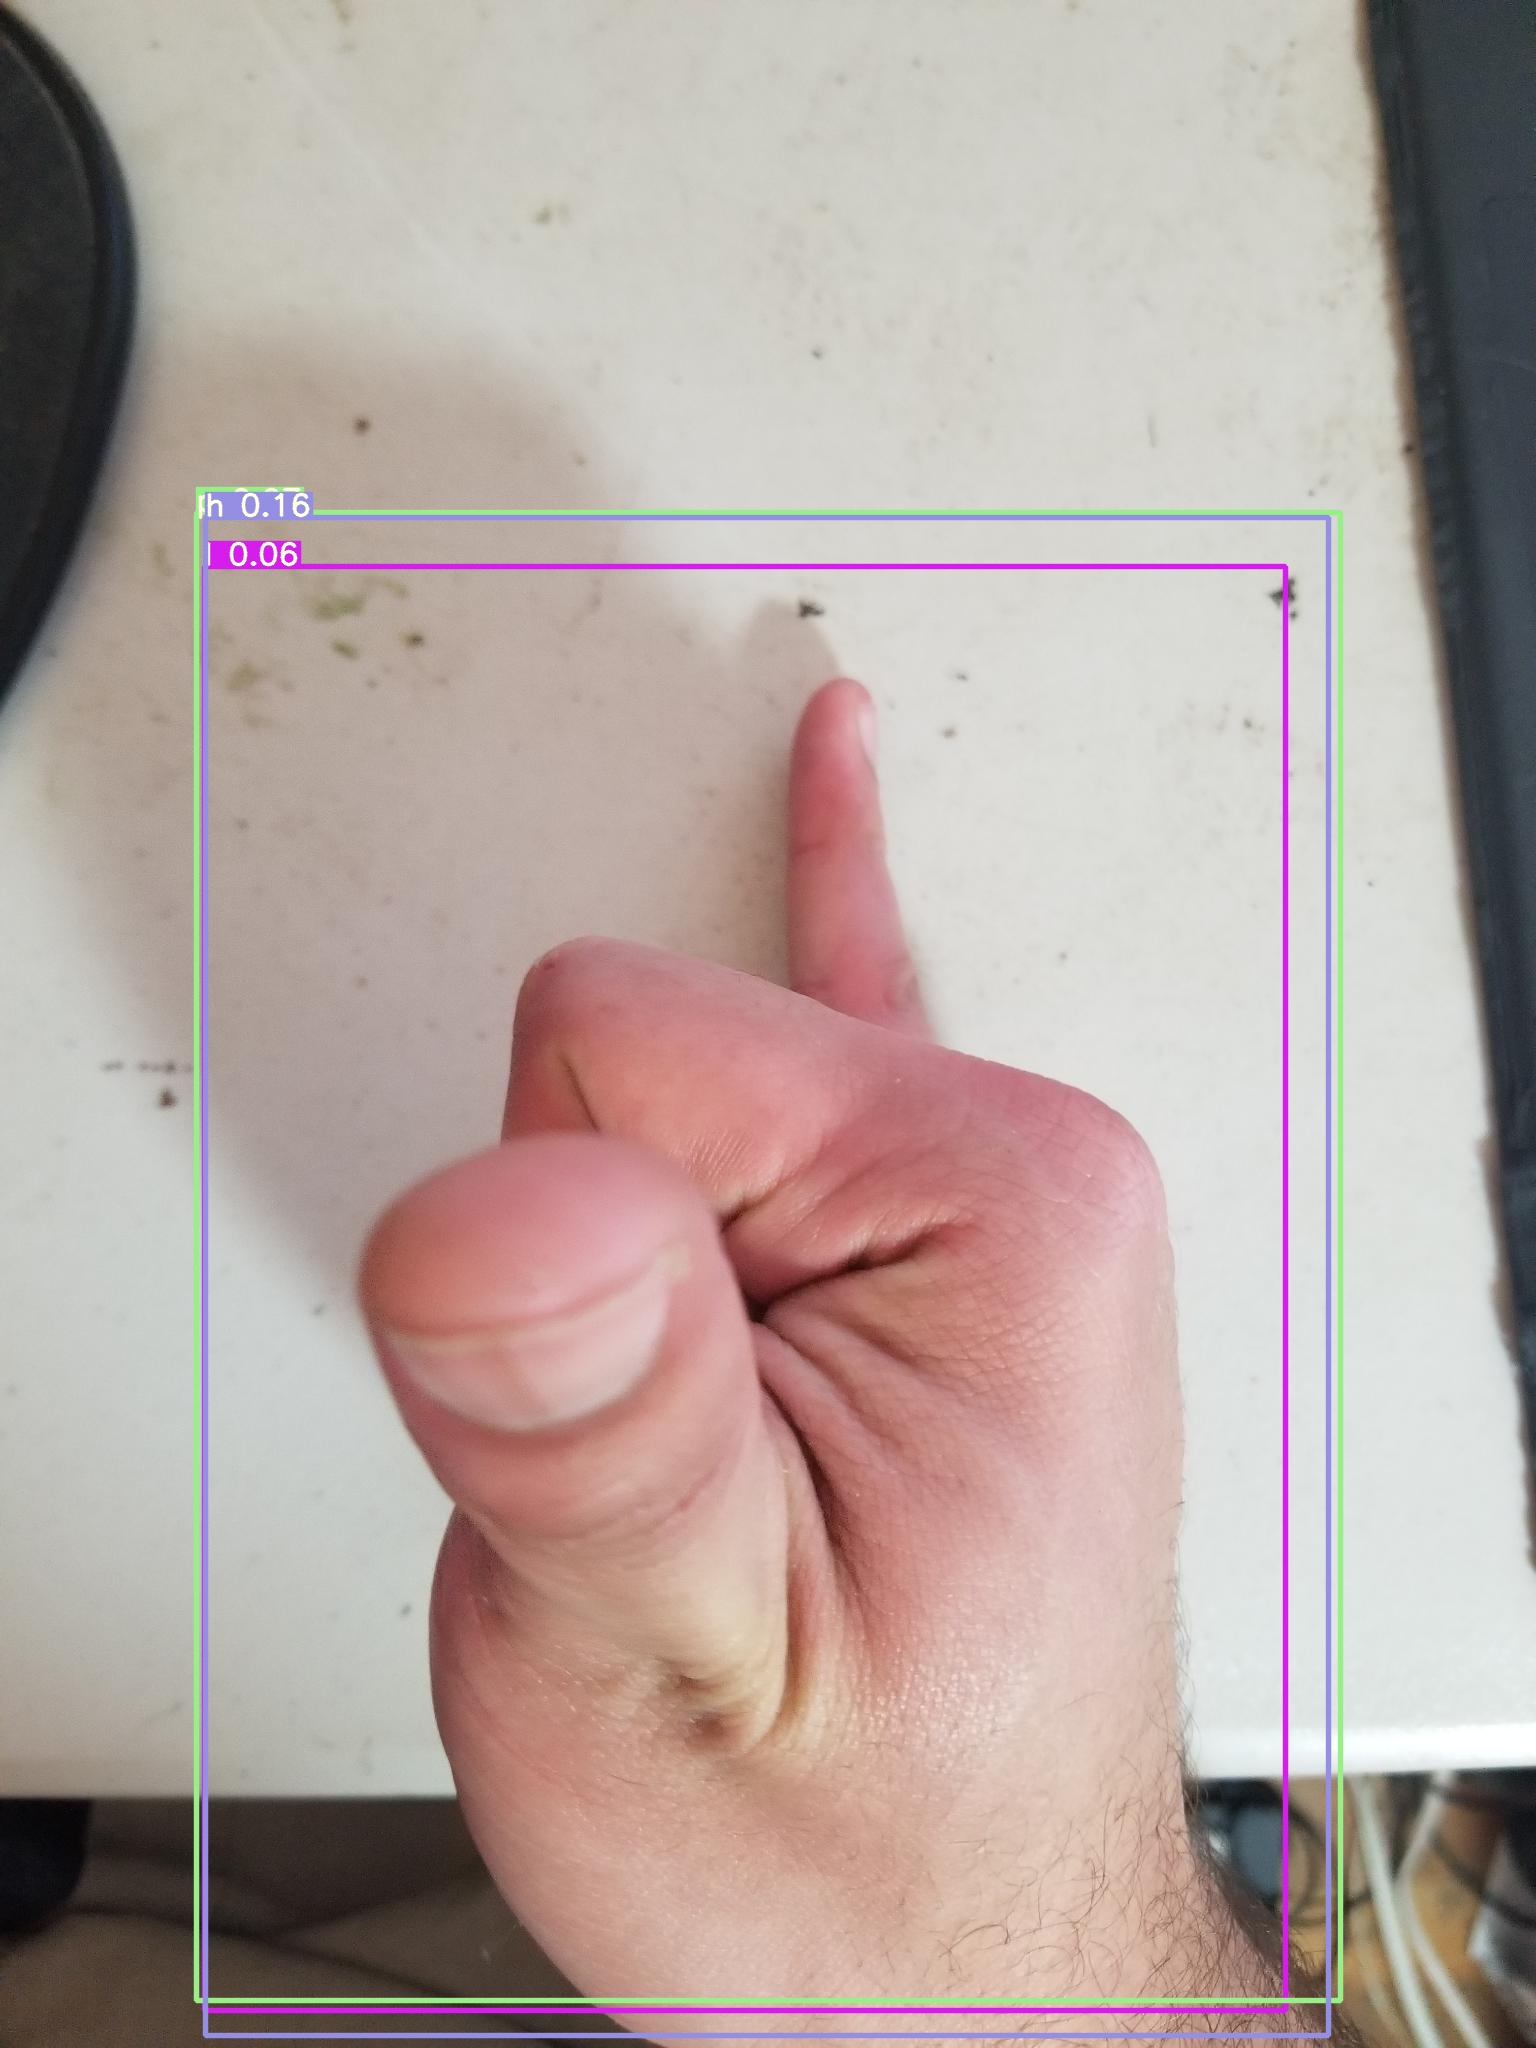

In [ ]:
Image(filename='./runs/detect/exp2/y_3_jpg.rf.ea514b81c6daf7c19e64e72428118143.jpg', width=1500)


## 15. Saving our YOLOv5 directory to our drive

In [ ]:
#This will save your YoloV5 directory with model, weights, and results, to your mounted Google Drive
%cp -r "/content/yolov5/" "/content/drive/MyDrive/Colab Notebooks/Project5/yolov5"

## 16. Using YOLOv5 model predictions on unseen data - new dataset

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.05 --source test_predict/


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.05, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='test_predict/', update=False, view_img=False, weights=['/content/yolov5/runs/train/exp/weights/best.pt'])
YOLOv5 🚀 v5.0-36-g3665c0f torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7115941 parameters, 0 gradients, 16.5 GFLOPS
image 1/26 /content/yolov5/test_predict/A_test.jpg: 640x640 Done. (0.011s)
image 2/26 /content/yolov5/test_predict/B_test.jpg: 640x640 Done. (0.011s)
image 3/26 /content/yolov5/test_predict/C_test.jpg: 640x640 1 l, 1 p, Done. (0.012s)
image 4/26 /content/yolov5/test_predict/D_test.jpg: 640x640 1 l, Done. (0.011s)
image 5/26 /content/yolov5/test_predict/E_test.jpg: 640x640 1 n, Done. (0.011s)
image 6/26 /content/yolov5/test_predict/

## 17. Validating the predicted labels on unseen data

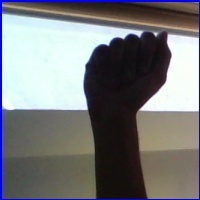

In [ ]:
# For letter A
Image(filename='./runs/detect/exp3/A_test.jpg', width=900)

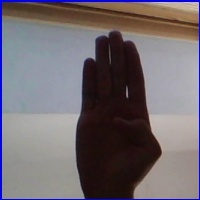

In [ ]:
# For letter B
Image(filename='./runs/detect/exp3/B_test.jpg', width=900)

## 18. Wrong Predictions on unseen data

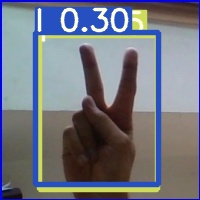

In [ ]:
#for letter K - as you can see it did not predict correctly. Predicting as I
Image(filename='./runs/detect/exp3/K_test.jpg', width=900)

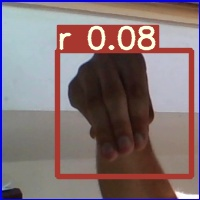

In [ ]:
#for letter M - as you can see it did not predict correctly. Predicting as r
Image(filename='./runs/detect/exp3/M_test.jpg', width=900)

## 19. Summary

The Yolov5 model running with 50 epochs produced very low precision scores and recall scores and noticed that the learning rate was improving towards the end. Need to run with more epochs to learn how our model is getting trained better.

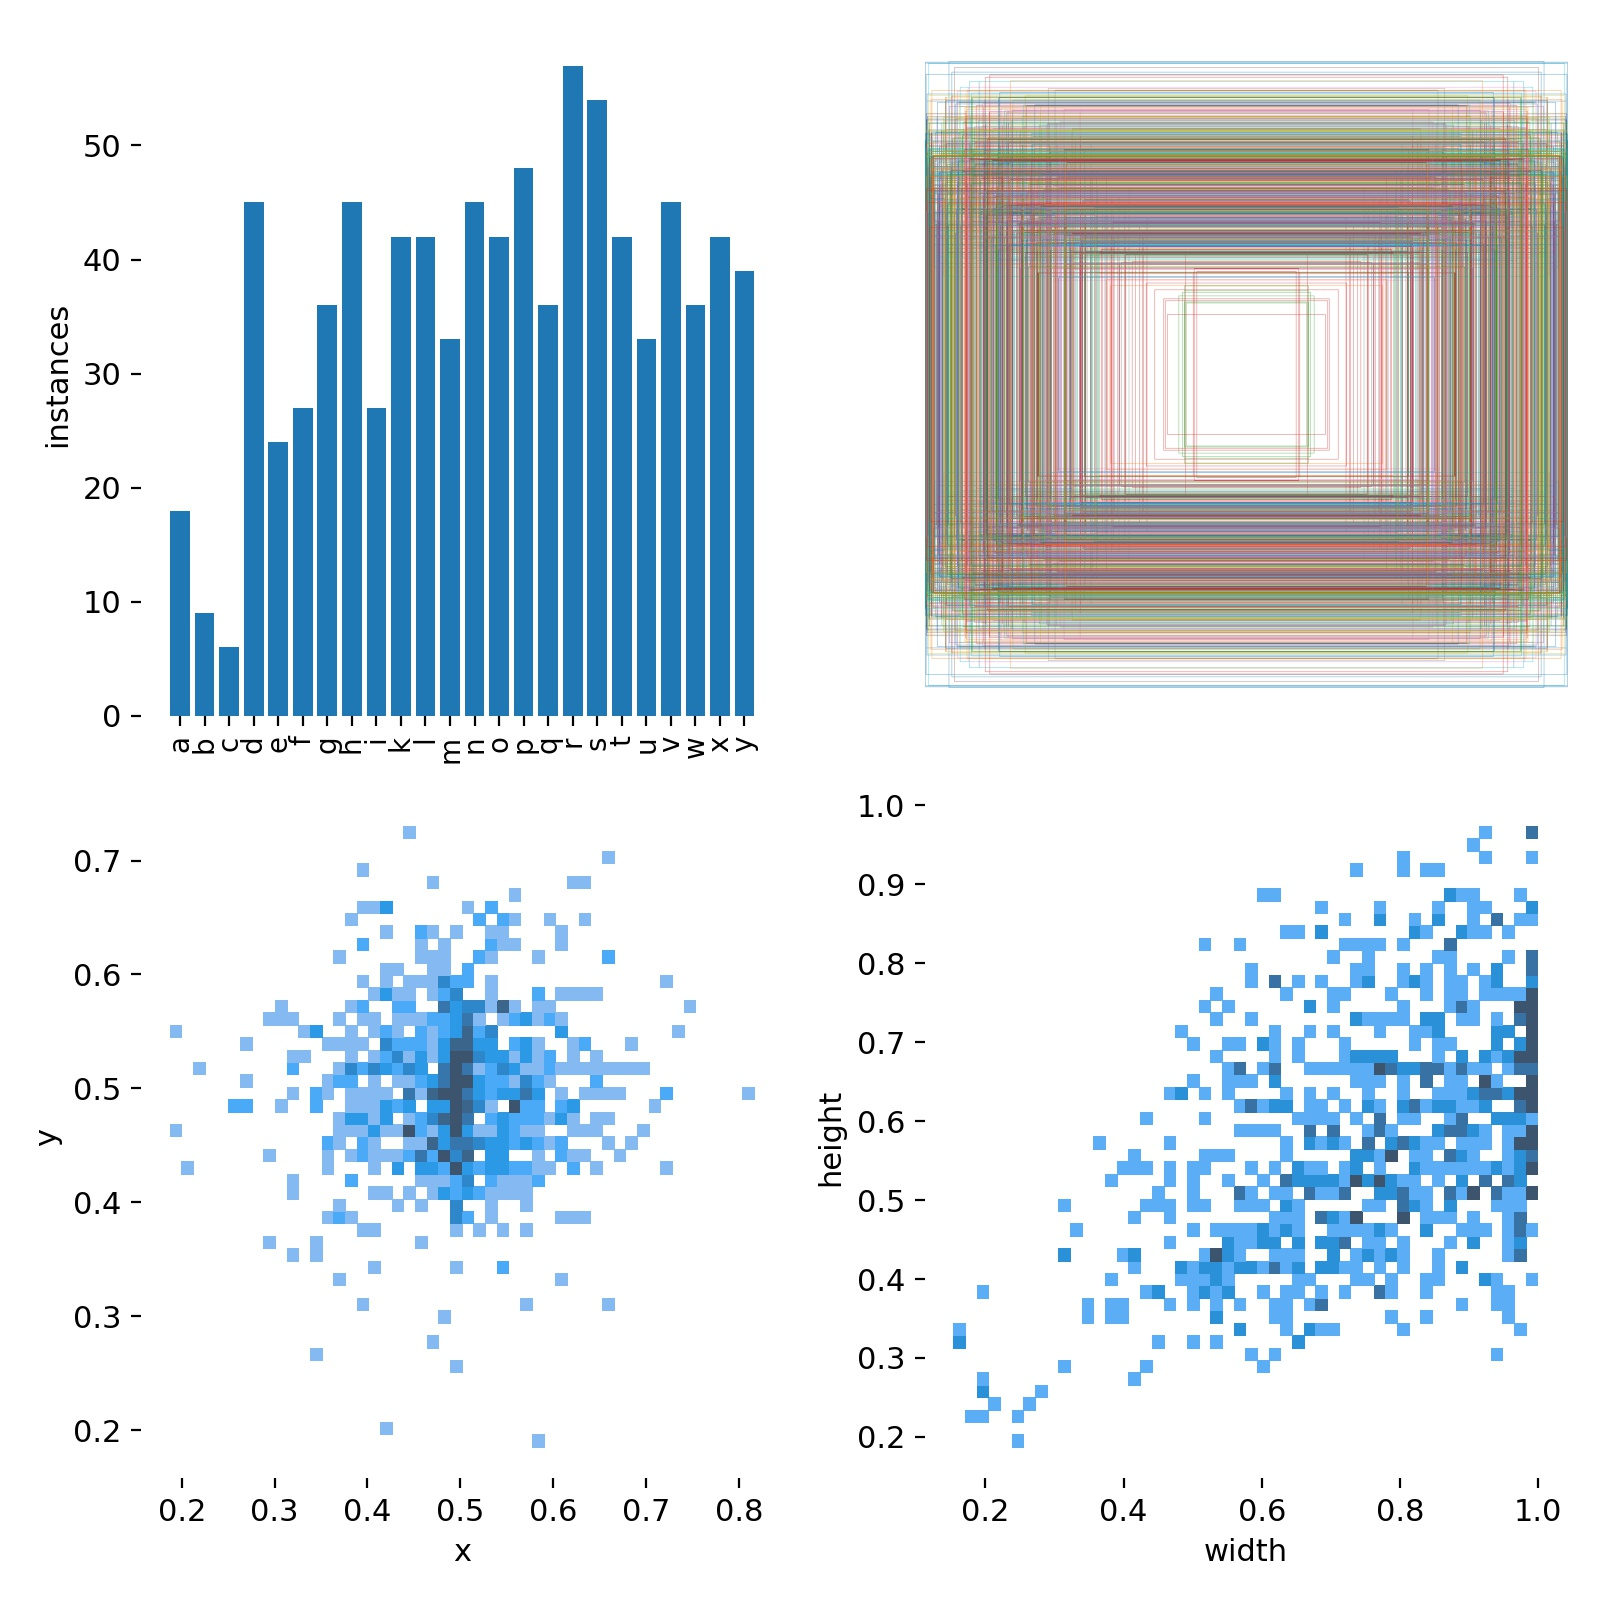

In [ ]:
Image(filename='./runs/train/exp/labels.jpg', width=700)